In [307]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install numpy 



In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../data/Airbnb_London/listings.csv'



In [309]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
import matplotlib as mpl
font_path = '../data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
# 마이너스 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

In [310]:
df = pd.read_csv(path)
df = pd.DataFrame(df)

In [311]:
dat = df.copy()

In [312]:
dat.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,...,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.54
3,159736,https://www.airbnb.com/rooms/159736,20240319050633,2024-03-20,city scrape,A double Room 5mins from King's College Hospital,Calm sunny double room with a queen size bed a...,We love that in Loughborough Junction we live ...,https://a0.muscache.com/pictures/1067303/d2300...,766056,...,4.89,4.34,4.66,NaN,f,4,0,4,0,0.62
4,165336,https://www.airbnb.com/rooms/165336,20240319050633,2024-03-21,city scrape,Charming Flat in Notting Hill,A stylish apartment close to Portobello market...,"Notting Hill has many cafes, bars and restaura...",https://a0.muscache.com/pictures/60757460/47f8...,761400,...,4.96,4.87,4.71,NaN,f,1,1,0,0,1.57


In [313]:
#필요한 컬럼 가져오기 
selected_columns = ['id','listing_url','description','host_id','host_response_time','host_response_rate','host_acceptance_rate','host_has_profile_pic',
                    'host_identity_verified','host_is_superhost','host_total_listings_count','neighbourhood_cleansed','latitude',
                    'longitude','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','has_availability',
                    'minimum_nights','maximum_nights','maximum_maximum_nights','minimum_maximum_nights','number_of_reviews','number_of_reviews_l30d',
                    'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                    'review_scores_checkin','review_scores_communication','review_scores_location',
                    'review_scores_value','reviews_per_month']
df = df[selected_columns]

df.head(3)


,id,listing_url,description,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,host_is_superhost,...,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,within a few hours,100%,98%,t,t,t,...,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,within a few hours,86%,84%,t,t,t,...,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,within a day,100%,40%,t,t,f,...,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


In [314]:
df.columns

Index(['id', 'listing_url', 'description', 'host_id', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'has_availability', 'minimum_nights',
       'maximum_nights', 'maximum_maximum_nights', 'minimum_maximum_nights',
       'number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [315]:
#숙소/숙박관련 컬럼

df_lodging = dat[['id', 'host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
                  'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
                  'beds','amenities','price','minimum_nights','maximum_nights']]
df_lodging.head(3)

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights
0,312761,1608226,within a few hours,100%,98%,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,54730,within a few hours,86%,84%,t,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,60302,within a day,100%,40%,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [316]:
# 컬럼명 변경

df_lodging = df_lodging.rename(columns={
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_response_time': '답변_평균시간',
    'host_response_rate': '문의_응답률',
    'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일'
})

df_lodging.head(3)

,숙소_id,호스트_id,답변_평균시간,문의_응답률,예약_수락률,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용인원수,욕실수,침실수,침대수,편의시설,숙소_가격,최소_숙박일,최대_숙박일
0,312761,1608226,within a few hours,100%,98%,t,3.0,Hackney,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180
1,13913,54730,within a few hours,86%,84%,t,5.0,Islington,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29
2,15400,60302,within a day,100%,40%,f,1.0,Kensington and Chelsea,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30


In [317]:
#리뷰관련데이터
df_review = dat[['number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
                'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                'review_scores_location', 'review_scores_value', 'reviews_per_month']]
df_review.head(3)

,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54


In [318]:
# 컬럼명 변경
df_review = df_review.rename(columns={
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
})
df_review.head()

,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54
3,96,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62
4,237,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57


In [319]:
df_lodging.shape

(90852, 17)

In [320]:
df_review.shape

(90852, 10)

컬렴명 변경 

- 'id' : '숙소 id'
- 'listing_url' : '숙소 url'
- 'description' : '숙소상세설명'
- 'host_id' : '호스트 id'
- 'host_response_time' : '문의 답변 평균시간'
- 'host_response_rate' : '문의 응답률'
- 'host_acceptance_rate' : '예약 수락률'
- 'host_is_superhost' : '슈퍼호스트 여부'
- 'host_has_profile_pic' : '프로필사진_소유_여부'
- 'host_identity_verified' : '신원검증_여부'
- 'latitude' : '위도'
- 'longitude' : '경도'
- 'has_availability' : '숙소_예약가능_여부'
- 'host_total_listings_count' : '등록한 총 숙소 수'
- 'neighbourhood_cleansed' : '클린된 숙소 구'
- 'room_type' : '룸 유형'
- 'accommodates' : '수용 인원수'
- 'bathrooms' : '욕실수'
- 'bedrooms' : '침실수'
- 'beds' : '침대수'
- 'amenities' : '어메니티'
- 'price' : '숙소 가격'
- 'minimum_nights' : '최소 숙박일'
- 'maximum_nights' : '최대 숙박일'
- 'number_of_reviews' : '총 리뷰수'
- 'number_of_reviews_l30d' : '한달치 리뷰수'
- 'review_scores_rating' : '리뷰 총점수'
- 'review_scores_accuracy' : '리뷰점수(숙소정보 정확성 )'
- 'review_scores_cleanliness' : '리뷰점수(청결함)'
- 'review_scores_checkin' : '리뷰점수(체크인과정)'
- 'review_scores_communication' : '리뷰점수(호스트와 소통)'
- 'review_scores_location' : '리뷰점수(숙소위치)'
- 'review_scores_value' : '리뷰점수(숙소가격)'
- 'reviews_per_month' : '월별 평균 리뷰수'

In [321]:
#컬럼명 변경 
df = df.rename(columns={
    'id' : '숙소_id',
    'listing_url' : '숙소_url',
    'description' : '숙소_상세설명',
    'host_id' : '호스트_id',
    'host_response_time' : '답변_평균시간',
    'host_response_rate' : '문의_응답률',
    'host_acceptance_rate' : '예약_수락률',
    'host_is_superhost' : '슈퍼호스트',
    'host_total_listings_count' : '숙소_수',
    'host_has_profile_pic' : '프로필사진_소지_여부',
    'host_identity_verified' : '신원_검증_여부',
    'neighbourhood_cleansed' : '숙소_지역',
    'latitude' : '위도',
    'longitude' : '경도',
    'room_type' : '숙소_유형',
    'accommodates' : '수용인원수',
    'bathrooms' : '욕실수',
    'bedrooms' : '침실수',
    'beds' : '침대수',
    'amenities' : '어메니티',
    'price' : '숙소_가격',
    'minimum_nights' : '최소_숙박일',
    'maximum_nights' : '최대_숙박일',
    'minimum_maximum_nights' : '적은_최대_숙박일',
    'maximum_maximum_nights' : '많은_최대_숙박일',
    'has_availability' : '숙소_예약가능_여부',
    'number_of_reviews' : '리뷰수',
    'number_of_reviews_l30d' : '30일_리뷰수',
    'review_scores_rating' : '리뷰점수',
    'review_scores_accuracy' : '숙소_정확성_리뷰점수',
    'review_scores_cleanliness' : '숙소_청결도_리뷰점수',
    'review_scores_checkin' : '숙소_체크인_리뷰점수',
    'review_scores_communication' : '숙소_소통_리뷰점수',
    'review_scores_location' : '숙소_위치_리뷰점수',
    'review_scores_value' : '숙소_가격_리뷰점수',
    'reviews_per_month' : '평균_리뷰수'
})

In [322]:
df.shape

(90852, 36)

In [323]:
df.columns

Index(['숙소_id', '숙소_url', '숙소_상세설명', '호스트_id', '답변_평균시간', '문의_응답률', '예약_수락률',
       '프로필사진_소지_여부', '신원_검증_여부', '슈퍼호스트', '숙소_수', '숙소_지역', '위도', '경도',
       '숙소_유형', '수용인원수', '욕실수', '침실수', '침대수', '어메니티', '숙소_가격', '숙소_예약가능_여부',
       '최소_숙박일', '최대_숙박일', '많은_최대_숙박일', '적은_최대_숙박일', '리뷰수', '30일_리뷰수', '리뷰점수',
       '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수',
       '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [324]:
df.dtypes

숙소_id            int64
숙소_url          object
숙소_상세설명         object
호스트_id           int64
답변_평균시간         object
문의_응답률          object
예약_수락률          object
프로필사진_소지_여부     object
신원_검증_여부        object
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
위도             float64
경도             float64
숙소_유형           object
수용인원수            int64
욕실수            float64
침실수            float64
침대수            float64
어메니티            object
숙소_가격           object
숙소_예약가능_여부      object
최소_숙박일           int64
최대_숙박일           int64
많은_최대_숙박일      float64
적은_최대_숙박일      float64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

In [325]:
#중복값 제거 
df.drop_duplicates(inplace=True)

In [326]:
df['숙소_url']

0                     https://www.airbnb.com/rooms/312761
1                      https://www.airbnb.com/rooms/13913
2                      https://www.airbnb.com/rooms/15400
3                     https://www.airbnb.com/rooms/159736
4                     https://www.airbnb.com/rooms/165336
                               ...                       
90847    https://www.airbnb.com/rooms/1115272743905612628
90848    https://www.airbnb.com/rooms/1115272767893608505
90849    https://www.airbnb.com/rooms/1115285644506865913
90850    https://www.airbnb.com/rooms/1115338006572763275
90851    https://www.airbnb.com/rooms/1115347885713265376
Name: 숙소_url, Length: 90852, dtype: object

결측치 해야할 것 <br>

욕실침대침실수(크롤링)/문의_응답률(크롤링)/숙소_가격??/숙소_정확성_리뷰점수(31개)/숙소_청결도_리뷰점수(26개)/숙소_체크인_리뷰점수(61개)/숙소_소통_리뷰점수(36개)/숙소_위치_리뷰점수(61개)/숙소_가격_리뷰점수(63개)

<h3>리뷰점수 결측치 처리</h3>

- 좋은 숙소를 분석하기 위해서 리뷰가 있어야 알 수 있기 때문에 리뷰수가 0인걸 제거함 (즉, 리뷰점수가 nan인 값을 제거)
- 리뷰점수의 Nan 값 24983개<br>
- 리뷰수가 0일때 리뷰점수가 nan값을 지님<br>

- 리뷰점수의 null값 개수 == 리뷰수가 0일때 리뷰점수의 개수


In [327]:
#리뷰점수의 null값 개수
df['리뷰점수'].isnull().sum()

24983

In [328]:
df[(df['리뷰수'] == 0) & df['리뷰점수'] == 0].isna().count()

숙소_id          90852
숙소_url         90852
숙소_상세설명        90852
호스트_id         90852
답변_평균시간        90852
문의_응답률         90852
예약_수락률         90852
프로필사진_소지_여부    90852
신원_검증_여부       90852
슈퍼호스트          90852
숙소_수           90852
숙소_지역          90852
위도             90852
경도             90852
숙소_유형          90852
수용인원수          90852
욕실수            90852
침실수            90852
침대수            90852
어메니티           90852
숙소_가격          90852
숙소_예약가능_여부     90852
최소_숙박일         90852
최대_숙박일         90852
많은_최대_숙박일      90852
적은_최대_숙박일      90852
리뷰수            90852
30일_리뷰수        90852
리뷰점수           90852
숙소_정확성_리뷰점수    90852
숙소_청결도_리뷰점수    90852
숙소_체크인_리뷰점수    90852
숙소_소통_리뷰점수     90852
숙소_위치_리뷰점수     90852
숙소_가격_리뷰점수     90852
평균_리뷰수         90852
dtype: int64

In [329]:
#리뷰수가 0일때 리뷰점수의 null개수
df[df['리뷰수'] == 0]['리뷰점수'].isnull().sum()

24983

In [330]:
#리뷰점수 nan값 제거 

df = df.dropna(subset=['리뷰점수'])
df.shape

(65869, 36)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65869 entries, 0 to 90735
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        65869 non-null  int64  
 1   숙소_url       65869 non-null  object 
 2   숙소_상세설명      64470 non-null  object 
 3   호스트_id       65869 non-null  int64  
 4   답변_평균시간      45111 non-null  object 
 5   문의_응답률       45111 non-null  object 
 6   예약_수락률       51189 non-null  object 
 7   프로필사진_소지_여부  65869 non-null  object 
 8   신원_검증_여부     65869 non-null  object 
 9   슈퍼호스트        65538 non-null  object 
 10  숙소_수         65869 non-null  float64
 11  숙소_지역        65869 non-null  object 
 12  위도           65869 non-null  float64
 13  경도           65869 non-null  float64
 14  숙소_유형        65869 non-null  object 
 15  수용인원수        65869 non-null  int64  
 16  욕실수          43758 non-null  float64
 17  침실수          58052 non-null  float64
 18  침대수          43703 non-null  float64
 19  어메니티     

침대수 침실수 욕실수 

In [332]:
df[(df['욕실수'].isna()) & (df['침실수'].isna()) & (df['침대수'].isna())][['욕실수','침실수','침대수']]

,욕실수,침실수,침대수
11,NaN,NaN,NaN
13,NaN,NaN,NaN
20,NaN,NaN,NaN
32,NaN,NaN,NaN
36,NaN,NaN,NaN
...,...,...,...
86126,NaN,NaN,NaN
86517,NaN,NaN,NaN
87290,NaN,NaN,NaN
87300,NaN,NaN,NaN


In [333]:
lodging_url = df[(df['욕실수'].isna()) & (df['침실수'].isna()) & (df['침대수'].isna())]['숙소_url']
lodging_url.values

array(['https://www.airbnb.com/rooms/170702',
       'https://www.airbnb.com/rooms/314985',
       'https://www.airbnb.com/rooms/315658', ...,
       'https://www.airbnb.com/rooms/1090452783507963913',
       'https://www.airbnb.com/rooms/1090481573621124067',
       'https://www.airbnb.com/rooms/1089818339739462728'], dtype=object)

<h3>숙소예약가능여부 결측치 처리</h3>

- 숙소 예약 가능 여부 null값 133개<br>
- 숙소 에약 가능 여부가 nan값의 숙소 url을 통해 예약불가능인 것을 확인 <br>
- 숙소 예약 가능 여부 nan값을 f로 변경<br>



In [334]:
df['숙소_예약가능_여부'].isna().sum()

1333

In [335]:
reservation_null = df[df['숙소_예약가능_여부'].isna()]
reservation_null

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
44,41870,https://www.airbnb.com/rooms/41870,"Lovely friendly house, close to central line u...",182993,NaN,NaN,NaN,t,f,f,...,2,0,4.50,5.00,5.00,4.00,5.00,4.00,4.00,0.01
85,230839,https://www.airbnb.com/rooms/230839,Superbly located studio flat in charming facto...,671259,NaN,NaN,NaN,t,f,f,...,4,0,4.50,5.00,5.00,5.00,5.00,5.00,5.00,0.03
198,278559,https://www.airbnb.com/rooms/278559,NaN,1453552,NaN,NaN,NaN,t,f,f,...,6,0,5.00,4.83,5.00,5.00,5.00,5.00,5.00,0.04
364,410201,https://www.airbnb.com/rooms/410201,Lovely modern flat in Wimbledon. 5 min walk fr...,2042167,NaN,NaN,NaN,t,f,f,...,2,0,5.00,4.50,5.00,4.50,5.00,4.00,4.50,0.02
444,473073,https://www.airbnb.com/rooms/473073,NaN,2346010,NaN,NaN,NaN,t,f,f,...,110,0,4.27,4.40,4.28,4.53,4.63,4.12,4.20,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76431,1003067784582531059,https://www.airbnb.com/rooms/1003067784582531059,Escape to a peaceful oasis in the heart of Lon...,392987791,NaN,NaN,63%,t,f,f,...,1,0,5.00,5.00,4.00,5.00,5.00,5.00,5.00,0.20
77711,1014793021961517676,https://www.airbnb.com/rooms/1014793021961517676,Book this downtown home for a group and enjoy ...,130918858,NaN,NaN,96%,t,f,NaN,...,3,0,3.67,3.67,3.33,3.33,5.00,5.00,4.33,0.72
78154,1018253908273348497,https://www.airbnb.com/rooms/1018253908273348497,NaN,17285051,within a few hours,100%,93%,t,t,f,...,2,0,5.00,5.00,4.50,5.00,5.00,5.00,4.50,0.49
78302,1019819973936818721,https://www.airbnb.com/rooms/1019819973936818721,Why not stay at Our amazing two bedroom two ba...,514872685,NaN,NaN,100%,t,f,f,...,2,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.45


In [336]:
df['숙소_예약가능_여부'].value_counts()

숙소_예약가능_여부
t    64463
f       73
Name: count, dtype: int64

In [337]:
df['숙소_예약가능_여부'] = df['숙소_예약가능_여부'].fillna('f')

In [338]:
df['숙소_예약가능_여부'].value_counts()


숙소_예약가능_여부
t    64463
f     1406
Name: count, dtype: int64

In [339]:
df['숙소_예약가능_여부'].isna().sum()

0

<h3>슈퍼호스트 결측치 처리 </h3>

- 슈퍼호스트 nan 값 331개 <br>
- 슈퍼호스트가 nan값인 데이터에서 슈퍼호스트의 조건에 맞으면 t, 아니면 f로 값 변경 <br>

슈퍼호스트가 되려면

1. 숙박 10건 이상 호스팅 또는 3건의 예약에 걸쳐 총 100박 이상 호스팅
2. 응답률 90% 이상 유지
3. 예약 취소율 1% 미만 유지. 단, 정상참작이 가능한 상황에 따른 예약 취소는 제외
4. 전체 평점 4.8점 이상 유지(후기 작성 기한인 14일이 지나거나, 그전에라도 게스트와 호스트 양측이 모두 후기를 제출하면 후기는 슈퍼호스트 실적에 계산됩니다).

문의_응답률 / 예약_수략률 데이터타입 str >> float 변경

In [340]:
df['호스트_id']

0          1608226
1            54730
2            60302
3           766056
4           761400
           ...    
90451     92967793
90568     96218725
90590    559052240
90648     15269465
90735    567320176
Name: 호스트_id, Length: 65869, dtype: int64

In [341]:
df['문의_응답률'].isna().sum()

20758

In [342]:
res = df[df['문의_응답률'].isna()]
res.head(3)

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
5,313710,https://www.airbnb.com/rooms/313710,Bright First Floor 1 bed flat with private ro...,1612623,NaN,NaN,NaN,t,t,f,...,10,0,4.88,4.67,4.89,4.89,5.00,4.56,4.67,0.07
6,168359,https://www.airbnb.com/rooms/168359,This 2 bedroom flat is in a brilliantly conven...,648725,NaN,NaN,NaN,t,f,f,...,9,0,4.63,4.75,4.63,4.88,4.88,4.13,4.75,0.06
8,24328,https://www.airbnb.com/rooms/24328,"Artist house, bright high ceiling rooms for bo...",41759,NaN,NaN,0%,t,t,f,...,94,0,4.90,4.89,4.91,4.90,4.93,4.59,4.65,0.58


In [343]:
res['호스트_id'].nunique()

18299

In [344]:
grouped = df[df['문의_응답률'].isna()].groupby("숙소_id")['호스트_id'].count()
grouped 

숙소_id
24328                  1
33332                  1
39387                  1
41509                  1
41870                  1
                      ..
1076795835615563072    1
1092841831654262251    1
1103498742555165723    1
1103503896033151954    1
1113540860743654582    1
Name: 호스트_id, Length: 20758, dtype: int64

In [345]:
df['문의_응답률'] = df['문의_응답률'].str.rstrip('%').astype('float')
df['문의_응답률'].head()

0    100.0
1     86.0
2    100.0
3    100.0
4    100.0
Name: 문의_응답률, dtype: float64

In [346]:
df['예약_수락률'] = df['예약_수락률'].str.rstrip('%').astype('float')
df['예약_수락률'].head()

0    98.0
1    84.0
2    40.0
3    78.0
4    92.0
Name: 예약_수락률, dtype: float64

In [347]:
#슈퍼호스트가 t인 값 중에 값이 맞는지 확인 
df_superhost_nan = df[df['슈퍼호스트'].isna()]
df_superhost_t = df[df['슈퍼호스트']=='t']
df_superhost_f = df[df['슈퍼호스트']=='f']
# print(df_superhost_t.count())
# print(df_superhost_f.count())


In [348]:
df_superhost_nan.head()

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
977,941492,https://www.airbnb.com/rooms/941492,This cosy room is very close to the tourist at...,1886636,within a day,88.0,100.0,t,t,NaN,...,60,0,4.46,4.41,4.22,4.52,4.60,4.60,4.29,0.45
3043,4135968,https://www.airbnb.com/rooms/4135968,Bright and spacious split level flat with balc...,21448060,within an hour,100.0,100.0,t,t,NaN,...,126,0,4.62,4.65,4.48,4.91,4.91,4.92,4.59,1.09
4528,6445907,https://www.airbnb.com/rooms/6445907,A large bedroom in our home. Comes equipped wi...,97874184,within an hour,100.0,100.0,t,t,NaN,...,342,4,4.73,4.77,4.72,4.88,4.88,4.59,4.73,3.19
4789,6751386,https://www.airbnb.com/rooms/6751386,"Bright and modern flat, newly renovated with g...",35351106,within an hour,100.0,100.0,t,t,NaN,...,167,0,4.51,4.64,4.31,4.71,4.78,4.63,4.50,1.57
6020,7854325,https://www.airbnb.com/rooms/7854325,The flat is strategically located in the lovel...,7925429,NaN,NaN,NaN,t,t,NaN,...,2,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.02


In [349]:
df_superhost_nan[['문의_응답률','숙소_url']]

,문의_응답률,숙소_url
977,88.0,https://www.airbnb.com/rooms/941492
3043,100.0,https://www.airbnb.com/rooms/4135968
4528,100.0,https://www.airbnb.com/rooms/6445907
4789,100.0,https://www.airbnb.com/rooms/6751386
6020,NaN,https://www.airbnb.com/rooms/7854325
...,...,...
87326,100.0,https://www.airbnb.com/rooms/1089819701466114763
87357,100.0,https://www.airbnb.com/rooms/1089834865130877365
87417,100.0,https://www.airbnb.com/rooms/1091869296244755027
87467,100.0,https://www.airbnb.com/rooms/1091234373495199780


In [350]:
df_superhost_nan['문의_응답률'].isna().sum()

78

In [351]:
#슈퍼호스트가 되기위한 조건 
condition = ((df_superhost_nan['리뷰수'] >= 10) | (df_superhost_nan['최대_숙박일'] >= 100.0)) & (df_superhost_nan['리뷰점수'] >= 4.8) & (df_superhost_nan['문의_응답률'] >= 90.0)

In [352]:
condition.count()

331

In [353]:
#조건에 충족하는 행이 69개  >> t / 불충족 262 >> f

print(df_superhost_nan[condition]['슈퍼호스트'].count())
print(df_superhost_nan[~condition]['슈퍼호스트'].count())


0
0


In [354]:

df_superhost_nan['슈퍼호스트'] = df_superhost_nan[condition]['슈퍼호스트'].fillna('t')

In [355]:
df_superhost_nan['슈퍼호스트']

977      NaN
3043     NaN
4528     NaN
4789     NaN
6020     NaN
        ... 
87326    NaN
87357    NaN
87417    NaN
87467      t
87585    NaN
Name: 슈퍼호스트, Length: 331, dtype: object

In [356]:
df_superhost_nan['슈퍼호스트'] = df_superhost_nan['슈퍼호스트'].fillna('f')


In [357]:
df_superhost_nan['슈퍼호스트']


977      f
3043     f
4528     f
4789     f
6020     f
        ..
87326    f
87357    f
87417    f
87467    t
87585    f
Name: 슈퍼호스트, Length: 331, dtype: object

In [358]:
df.loc[df_superhost_nan.index, "슈퍼호스트"] = df_superhost_nan['슈퍼호스트']

In [359]:
df['슈퍼호스트'].value_counts()

슈퍼호스트
f    52720
t    13149
Name: count, dtype: int64

In [360]:
superhost_t_mean = df_superhost_t['문의_응답률'].mean()
superhost_f_mean = df_superhost_f['문의_응답률'].mean()
superhost_nan_mean = df_superhost_nan['문의_응답률'].mean()
print(superhost_t_mean)
print(superhost_f_mean)
print(superhost_nan_mean)

98.81400491400491
93.15814138691498
98.74703557312253


In [361]:
df_superhost_t[df_superhost_t['문의_응답률'] >= superhost_t_mean]['문의_응답률'].count()

# 12210 중에 11234개가 응답률이 평균값보다 높음

11234

In [362]:
df_superhost_f[df_superhost_f['문의_응답률'] >= superhost_f_mean]['문의_응답률'].count()
#32648 중에 26889개

26889

In [363]:
df_superhost_nan[df_superhost_nan['문의_응답률'] >= superhost_nan_mean]['문의_응답률'].count()
#253 중에 232개


232

In [364]:
print(df_superhost_t['문의_응답률'].describe())
print()
print(df_superhost_f['문의_응답률'].describe())
print()
print(df_superhost_nan['문의_응답률'].describe())

count    12210.000000
mean        98.814005
std          6.318457
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: 문의_응답률, dtype: float64

count    32648.000000
mean        93.158141
std         19.133072
min          0.000000
25%         98.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: 문의_응답률, dtype: float64

count    253.000000
mean      98.747036
std        6.103541
min       50.000000
25%      100.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: 문의_응답률, dtype: float64


In [365]:
print(df_superhost_t['예약_수락률'].describe())
print()
print(df_superhost_f['예약_수락률'].describe())
print()
print(df_superhost_nan['예약_수락률'].describe())


count    13066.000000
mean        90.904791
std         13.576599
min          0.000000
25%         88.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: 예약_수락률, dtype: float64

count    37853.000000
mean        83.515521
std         25.238887
min          0.000000
25%         75.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: 예약_수락률, dtype: float64

count    270.000000
mean      94.644444
std       14.515710
min        0.000000
25%       99.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: 예약_수락률, dtype: float64


In [366]:
print(df_superhost_t['리뷰점수'].describe())
print()
print(df_superhost_f['리뷰점수'].describe())
print()
print(df_superhost_nan['리뷰점수'].describe())

count    13080.000000
mean         4.867516
std          0.179994
min          1.000000
25%          4.810000
50%          4.910000
75%          5.000000
max          5.000000
Name: 리뷰점수, dtype: float64

count    52458.000000
mean         4.666665
std          0.471139
min          0.000000
25%          4.500000
50%          4.800000
75%          5.000000
max          5.000000
Name: 리뷰점수, dtype: float64

count    331.000000
mean       4.675921
std        0.320133
min        3.400000
25%        4.500000
50%        4.730000
75%        4.970000
max        5.000000
Name: 리뷰점수, dtype: float64


In [367]:
print(df_superhost_t['리뷰수'].describe())
print()
print(df_superhost_f['리뷰수'].describe())
print()
print(df_superhost_nan['리뷰수'].describe())

count    13080.000000
mean        44.136774
std         66.437282
min          1.000000
25%          9.000000
50%         21.000000
75%         52.000000
max       1361.000000
Name: 리뷰수, dtype: float64

count    52458.000000
mean        19.618094
std         41.705161
min          1.000000
25%          2.000000
50%          7.000000
75%         19.000000
max       1672.000000
Name: 리뷰수, dtype: float64

count    331.000000
mean      35.525680
std       50.373229
min        1.000000
25%        4.000000
50%       14.000000
75%       48.500000
max      342.000000
Name: 리뷰수, dtype: float64


In [368]:
#한글깨짐방지
# !pip install koreanize-matplotlib
import koreanize_matplotlib


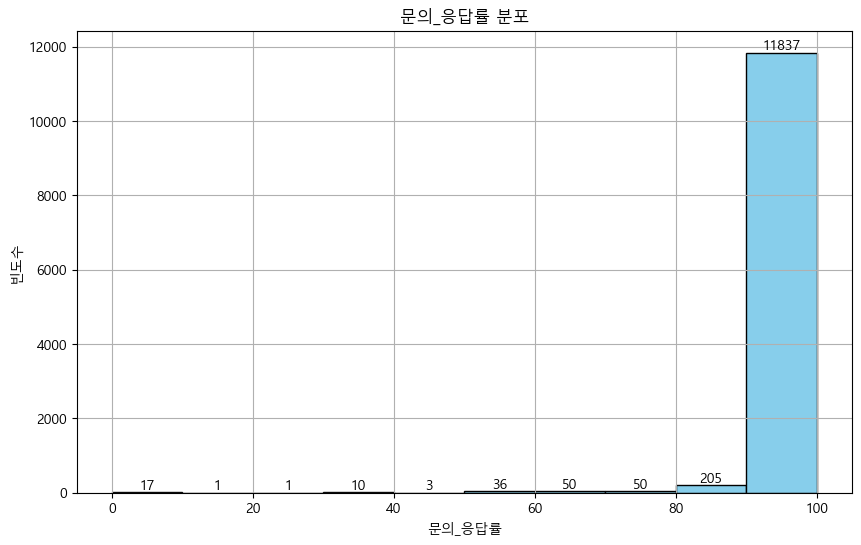

In [369]:
# 슈퍼호스트가 t일때의 문의_응답률 빈도수
import matplotlib.pyplot as plt
def histogram_show_t(df, column_name, bins=10):
    
    # 히스토그램 생성
    
    
    plt.figure(figsize=(10, 6))
    
    counts, bin_edges, patches = plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    
    # 각 막대 위에 빈도수 표시
    for count, bin_edge in zip(counts, bin_edges):
        plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, 
                str(int(count)), 
                ha='center', va='bottom')
        
    plt.xlabel(column_name)
    plt.ylabel('빈도수')
    plt.title(f'{column_name} 분포')
    plt.grid(True)
    plt.show()

histogram_show_t(df_superhost_t, '문의_응답률', bins=10)

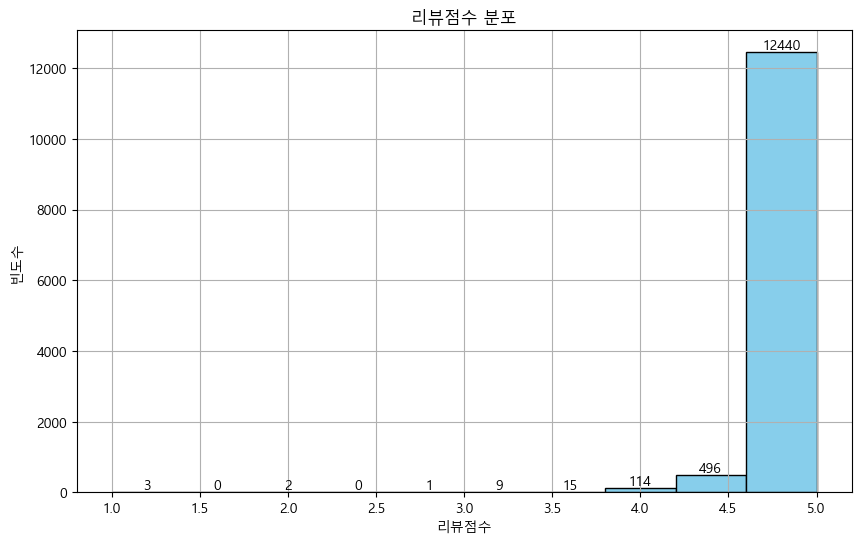

In [370]:
histogram_show_t(df_superhost_t, '리뷰점수', bins=10)


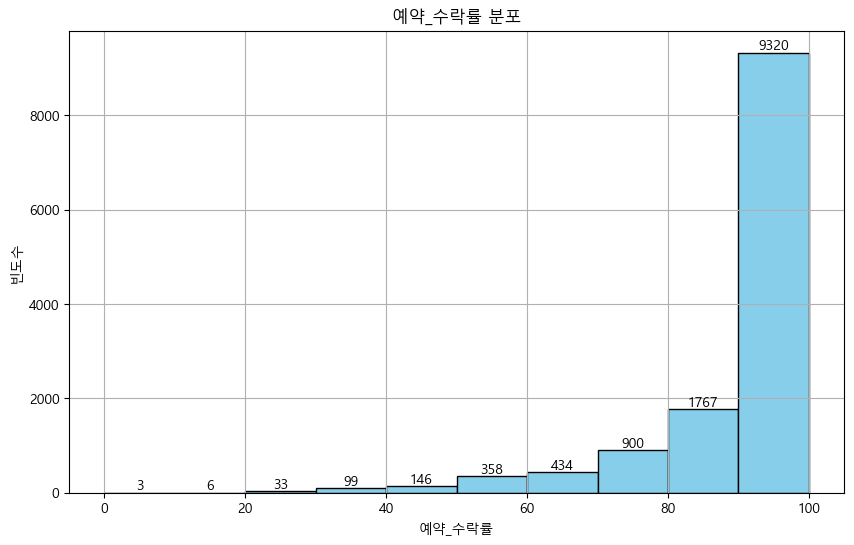

In [371]:
histogram_show_t(df_superhost_t, '예약_수락률', bins=10)

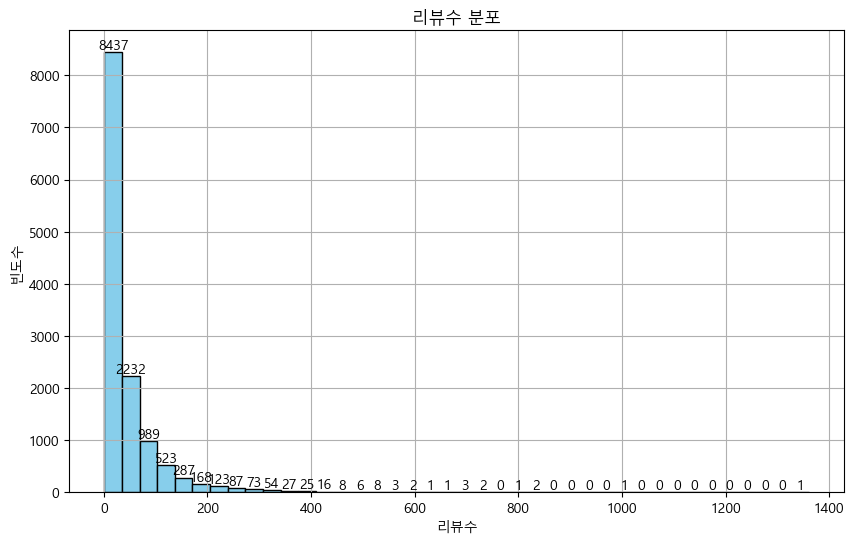

In [372]:
histogram_show_t(df_superhost_t, '리뷰수', bins=40)

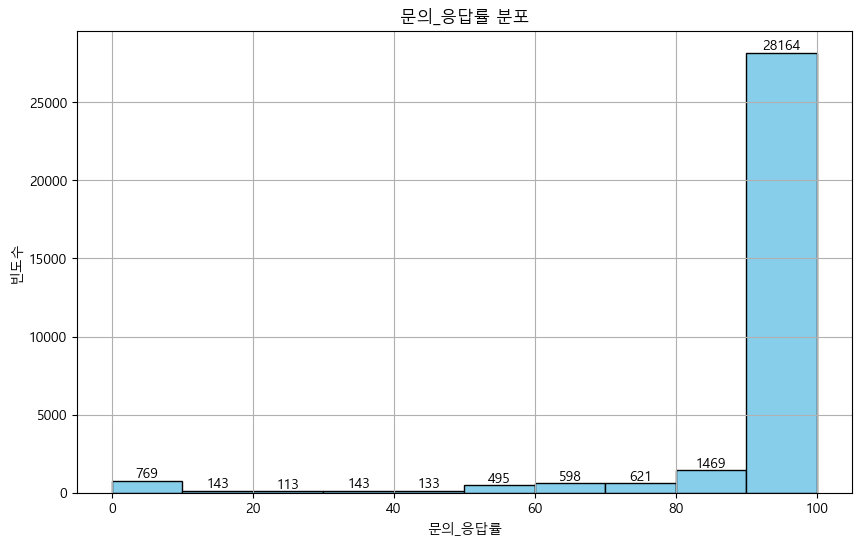

In [373]:
# 슈퍼호스트가 f일때의 문의_응답률 빈도수
import matplotlib.pyplot as plt
def histogram_show_f(df, column_name, bins=10):
    
    # 히스토그램 생성
    
    
    plt.figure(figsize=(10, 6))
    
    counts, bin_edges, patches = plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    
    # 각 막대 위에 빈도수 표시
    for count, bin_edge in zip(counts, bin_edges):
        plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, 
                str(int(count)), 
                ha='center', va='bottom')
        
    plt.xlabel(column_name)
    plt.ylabel('빈도수')
    plt.title(f'{column_name} 분포')
    plt.grid(True)
    plt.show()

histogram_show_f(df_superhost_f, '문의_응답률', bins=10)

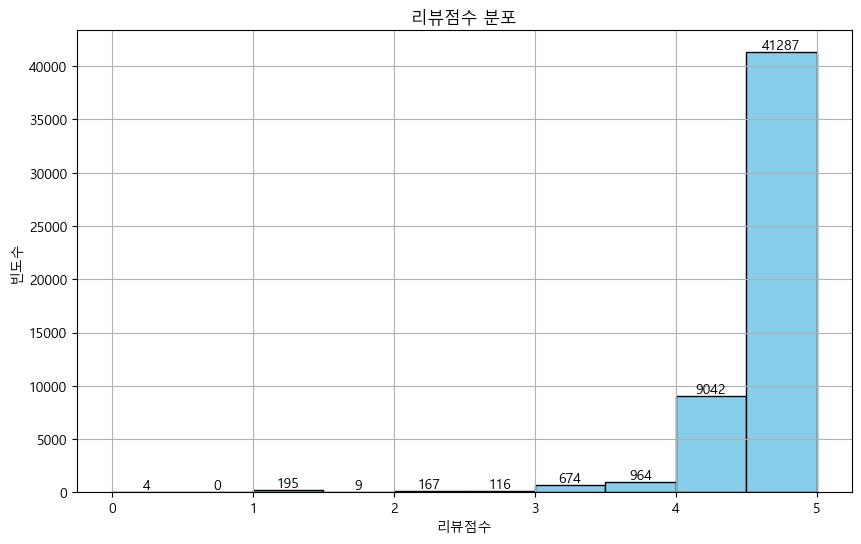

In [374]:
histogram_show_f(df_superhost_f, '리뷰점수', bins=10)

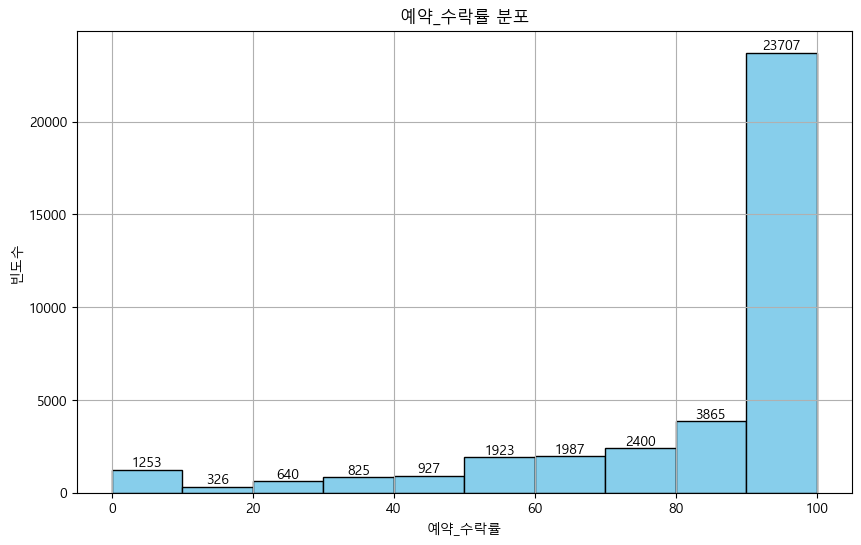

In [375]:
histogram_show_f(df_superhost_f, '예약_수락률', bins=10)


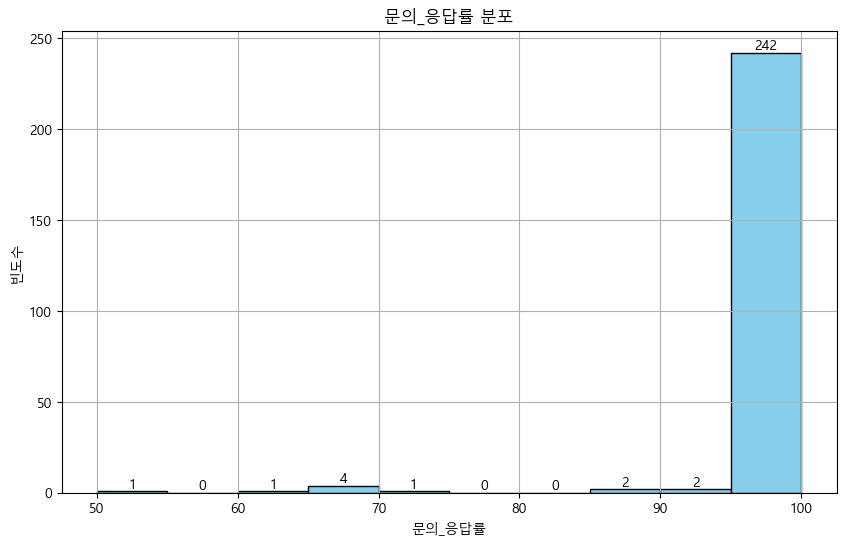

In [376]:
# 슈퍼호스트가 f일때의 문의_응답률 빈도수
import matplotlib.pyplot as plt
def histogram_show_nan(df, column_name, bins=10):
    
    # 히스토그램 생성
    
    
    plt.figure(figsize=(10, 6))
    
    counts, bin_edges, patches = plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    
    # 각 막대 위에 빈도수 표시
    for count, bin_edge in zip(counts, bin_edges):
        plt.text(bin_edge + (bin_edges[1] - bin_edges[0]) / 2, count, 
                str(int(count)), 
                ha='center', va='bottom')
        
    plt.xlabel(column_name)
    plt.ylabel('빈도수')
    plt.title(f'{column_name} 분포')
    plt.grid(True)
    plt.show()

histogram_show_nan(df_superhost_nan, '문의_응답률', bins=10)

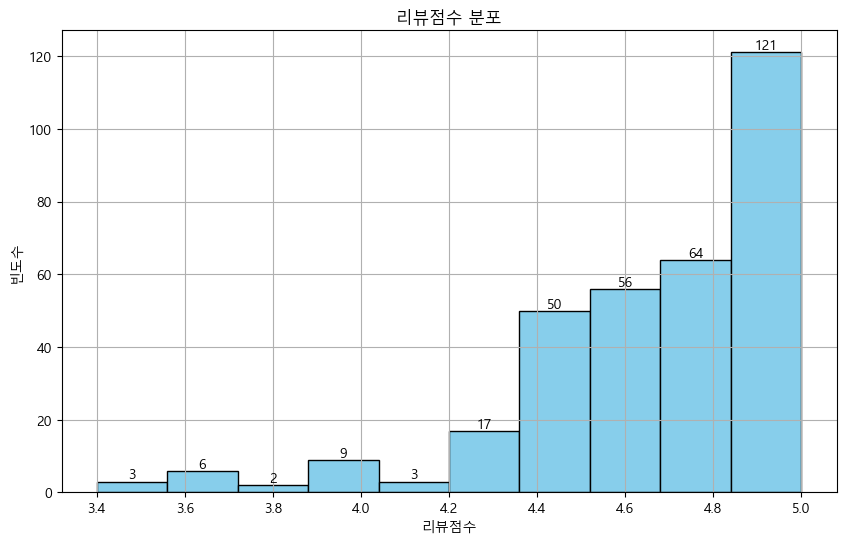

In [377]:
histogram_show_nan(df_superhost_nan, '리뷰점수', bins=10)

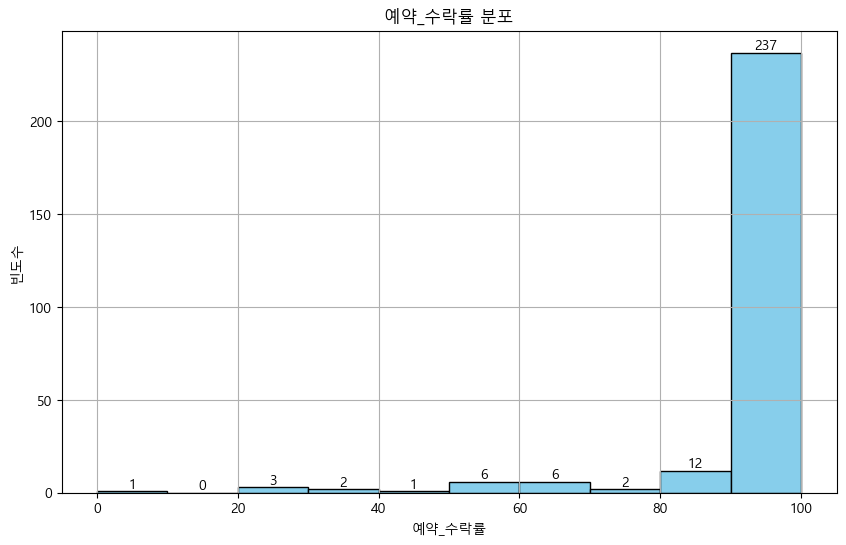

In [378]:
histogram_show_nan(df_superhost_nan, '예약_수락률', bins=10)


In [379]:
df['슈퍼호스트'].unique()

array(['t', 'f'], dtype=object)

In [380]:
df['슈퍼호스트'].value_counts()

슈퍼호스트
f    52720
t    13149
Name: count, dtype: int64

In [381]:
df['슈퍼호스트'].isna().sum()

0

In [382]:
superhost_nan = df[df['슈퍼호스트'].isna()]
superhost_nan.head(3)

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수


In [383]:
#슈퍼호스트가 되기위한 조건 
# condition = ((superhost_nan['숙소_수'] >= 10) | (superhost_nan['적은_최대_숙박일'] >= 100.0)) & (superhost_nan['리뷰점수'] >= 4.8)

In [384]:
condition.count()

331

In [385]:
#슈퍼호스트가 null값인 데이터가 슈퍼호스트의 조건에 만족하는지 
# superhost_nan.loc[:,'슈퍼호스트'] = superhost_nan[condition]['슈퍼호스트'].fillna('t')

In [386]:
# superhost_nan.loc[:,'슈퍼호스트'] = superhost_nan['슈퍼호스트'].isna().fillna('f')

In [387]:
# superhost_nan['슈퍼호스트']

In [388]:
# df.loc[superhost_nan.index, "슈퍼호스트"] = superhost_nan['슈퍼호스트']

In [389]:
df['슈퍼호스트'].value_counts()

슈퍼호스트
f    52720
t    13149
Name: count, dtype: int64

In [390]:
df['슈퍼호스트'].isna().sum()

0

<h3>숙소 가격 결측치 처리</h3>

- 숙소 가격 nan값 22141개 <br>
- 숙소 가격이 nan 값은 숙소 예약이 안됨<br>
- 숙소 가격이 nan값인 데이터의 숙소 예약여부를 f로 변경<br>
- nan값을 숙소측정불가로 바꿈<br>

In [391]:
df[['숙소_가격','숙소_url']]

,숙소_가격,숙소_url
0,$160.00,https://www.airbnb.com/rooms/312761
1,$65.00,https://www.airbnb.com/rooms/13913
2,$120.00,https://www.airbnb.com/rooms/15400
3,$65.00,https://www.airbnb.com/rooms/159736
4,$100.00,https://www.airbnb.com/rooms/165336
...,...,...
90451,$46.00,https://www.airbnb.com/rooms/1112236129628471308
90568,$78.00,https://www.airbnb.com/rooms/1112524736745357245
90590,$136.00,https://www.airbnb.com/rooms/1113042462528003601
90648,$109.00,https://www.airbnb.com/rooms/1113966989586525761


In [392]:
df['숙소_가격'].isna().sum()

22141

In [393]:
listing_reservation = df[df['숙소_가격'].isna()]

In [394]:
listing_reservation.loc[listing_reservation['숙소_예약가능_여부'] == 't', '숙소_예약가능_여부'] = 'f'


In [395]:
listing_reservation.loc[:,'숙소_예약가능_여부']

5        f
6        f
8        f
11       f
13       f
        ..
87276    f
87290    f
87300    f
87325    f
88004    f
Name: 숙소_예약가능_여부, Length: 22141, dtype: object

In [396]:
listing_reservation['숙소_예약가능_여부']


5        f
6        f
8        f
11       f
13       f
        ..
87276    f
87290    f
87300    f
87325    f
88004    f
Name: 숙소_예약가능_여부, Length: 22141, dtype: object

In [397]:
df.loc[listing_reservation.index, "숙소_예약가능_여부"] = listing_reservation['숙소_예약가능_여부']

In [398]:
df['숙소_예약가능_여부'].value_counts()

숙소_예약가능_여부
t    43720
f    22149
Name: count, dtype: int64

In [399]:
df['숙소_가격'].value_counts()

숙소_가격
$150.00      825
$60.00       769
$50.00       766
$100.00      760
$120.00      743
            ... 
$3,192.00      1
$1,453.00      1
$1,190.00      1
$839.00        1
$8.00          1
Name: count, Length: 944, dtype: int64

In [400]:
df['숙소_가격'] = df['숙소_가격'].str.replace('$','')
df['숙소_가격'] = df['숙소_가격'].str.replace(',','')

df['숙소_가격'] = df['숙소_가격'].fillna('0')
df['숙소_가격']

0        160.00
1         65.00
2        120.00
3         65.00
4        100.00
          ...  
90451     46.00
90568     78.00
90590    136.00
90648    109.00
90735     41.00
Name: 숙소_가격, Length: 65869, dtype: object

In [401]:
df['숙소_가격'].value_counts()


숙소_가격
0          22141
150.00       825
60.00        769
50.00        766
100.00       760
           ...  
578.00         1
1267.00        1
621.00         1
484.00         1
8.00           1
Name: count, Length: 945, dtype: int64

In [402]:
df.loc[:,'숙소_가격'] = df.loc[:,'숙소_가격'].astype(float)

In [403]:
df['숙소_가격']

0        160.0
1         65.0
2        120.0
3         65.0
4        100.0
         ...  
90451     46.0
90568     78.0
90590    136.0
90648    109.0
90735     41.0
Name: 숙소_가격, Length: 65869, dtype: object

<h3>문의_응답률 결측치 확인</h3>

24시간 이내에 응답<br>
모든 메시지, 특히 예약 문의에 24시간 이내에 답해주세요.<br> 
신속한 응답은 예약을 확정할 수 있는 가장 좋은 방법이며, 응답률도 높아지므로 숙소가 검색 결과 상위에 표시되는 데 도움이 됩니다.

리뷰수가 20개 미만 / 예약 가능여부가 다름 

In [404]:
df['문의_응답률'].value_counts()

문의_응답률
100.0    34340
98.0      1288
99.0      1262
90.0       897
0.0        765
         ...  
6.0          1
9.0          1
54.0         1
21.0         1
12.0         1
Name: count, Length: 84, dtype: int64

In [405]:
df['문의_응답률'].isna().sum()

20758

In [406]:
df[df['문의_응답률'].isna()]


,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
5,313710,https://www.airbnb.com/rooms/313710,Bright First Floor 1 bed flat with private ro...,1612623,NaN,NaN,NaN,t,t,f,...,10,0,4.88,4.67,4.89,4.89,5.00,4.56,4.67,0.07
6,168359,https://www.airbnb.com/rooms/168359,This 2 bedroom flat is in a brilliantly conven...,648725,NaN,NaN,NaN,t,f,f,...,9,0,4.63,4.75,4.63,4.88,4.88,4.13,4.75,0.06
8,24328,https://www.airbnb.com/rooms/24328,"Artist house, bright high ceiling rooms for bo...",41759,NaN,NaN,0.0,t,t,f,...,94,0,4.90,4.89,4.91,4.90,4.93,4.59,4.65,0.58
11,170702,https://www.airbnb.com/rooms/170702,NaN,814004,NaN,NaN,NaN,t,t,f,...,135,0,4.95,4.97,4.98,4.94,4.98,4.79,4.93,0.88
12,33332,https://www.airbnb.com/rooms/33332,"Walking distance to Twickenham Stadium, 35 min...",144444,NaN,NaN,NaN,t,f,f,...,20,0,4.40,4.47,4.58,4.58,4.53,4.68,4.26,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85542,1076793157085295540,https://www.airbnb.com/rooms/1076793157085295540,NaN,550679284,NaN,NaN,NaN,t,f,f,...,3,0,4.67,4.33,4.33,5.00,5.00,5.00,4.67,0.28
87554,1092841831654262251,https://www.airbnb.com/rooms/1092841831654262251,Room with a view to the hills and over the bac...,118310986,NaN,NaN,NaN,t,t,f,...,5,5,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
89051,1103498742555165723,https://www.airbnb.com/rooms/1103498742555165723,This double room is nice and spacious. Harold...,564935824,NaN,NaN,100.0,t,t,f,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
89056,1103503896033151954,https://www.airbnb.com/rooms/1103503896033151954,Harold wood station is a 5 minute bus away or ...,564935824,NaN,NaN,100.0,t,t,f,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [407]:
# df['문의_응답률'].fillna('0%')

In [408]:
# df['문의_응답률'] = df['문의_응답률'].fillna('0%')

In [409]:
# df['문의_응답률'].value_counts()


In [410]:
# df['문의_응답률'].isna().sum()


<h3>예약_수락률 결측치 처리</h3>


In [411]:
df['예약_수락률'].isna().sum()

14680

In [412]:
df['예약_수락률'].value_counts()

예약_수락률
100.0    18160
99.0      4363
98.0      2072
97.0      2026
96.0      1507
         ...  
7.0         13
12.0         8
3.0          7
2.0          3
1.0          1
Name: count, Length: 101, dtype: int64

<h3>답변_평균시간 결측치 처리</h3>

In [413]:
df['답변_평균시간']

0        within a few hours
1        within a few hours
2              within a day
3            within an hour
4            within an hour
                ...        
90451        within an hour
90568        within an hour
90590        within an hour
90648        within an hour
90735                   NaN
Name: 답변_평균시간, Length: 65869, dtype: object

In [414]:
df['답변_평균시간'].isna().sum()

20758

<h3>리뷰점수를 기준으로 이상치 처리</h3>

- 리뷰점수는 리뷰가 3개 이상일때 나타남 
- 리뷰점수가 0인 숙소는 4개 
- 리뷰수가 2개 이하인 숙소도 리뷰점수가 나타남 -> 확인해보니 리뷰수가 늘어나있음

In [415]:
df['리뷰수'].dtypes

dtype('int64')

In [416]:
df['리뷰점수'].describe()

count    65869.000000
mean         4.706596
std          0.436051
min          0.000000
25%          4.590000
50%          4.840000
75%          5.000000
max          5.000000
Name: 리뷰점수, dtype: float64

In [417]:
df.shape

(65869, 36)

In [418]:
#리뷰점수가 0인 행 삭제
df = df[df['리뷰점수'] != 0.0]

In [419]:
df.shape


(65865, 36)

In [420]:
df[df['리뷰점수'] == 2.0][['리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수',
                          '숙소_위치_리뷰점수','숙소_가격_리뷰점수']]

,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수
18179,2.0,2.00,3.00,3.00,1.00,4.00,2.0
27052,2.0,3.00,2.00,4.00,3.00,4.00,2.0
33229,2.0,1.00,2.00,2.00,1.00,1.00,1.0
36483,2.0,3.50,2.50,4.50,4.00,5.00,2.5
36494,2.0,2.33,1.67,3.33,2.33,3.67,2.0
...,...,...,...,...,...,...,...
88669,2.0,3.00,3.50,3.00,1.00,4.50,2.0
88768,2.0,2.00,1.00,5.00,4.00,5.00,1.0
89073,2.0,4.00,5.00,3.00,5.00,1.00,2.0
89106,2.0,2.00,1.00,4.00,4.00,4.00,2.0


In [421]:
df[df['리뷰점수'] == 1.0]['리뷰수']

25569    1
26193    1
26526    1
29696    1
35586    1
        ..
87786    1
87913    1
88950    1
89408    1
89746    1
Name: 리뷰수, Length: 196, dtype: int64

In [422]:
review_scores = df['리뷰점수']

In [423]:
#이상치 
#1단계 사분위수 (q1, q3, q2, iqr )
Q1 = review_scores.quantile(0.25)
Q3 = review_scores.quantile(0.75)
Median = review_scores.median()

IQR = Q3 - Q1 

print(Q1)
print(Q3)
print(IQR)
#2단계 : 이상치 임계값(threshold) 설정 

lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가


print(lower_bound)
print(upper_bound)

4.59
5.0
0.41000000000000014
3.9749999999999996
5.615


이상치 확인 (65865개중 2161개 발견)

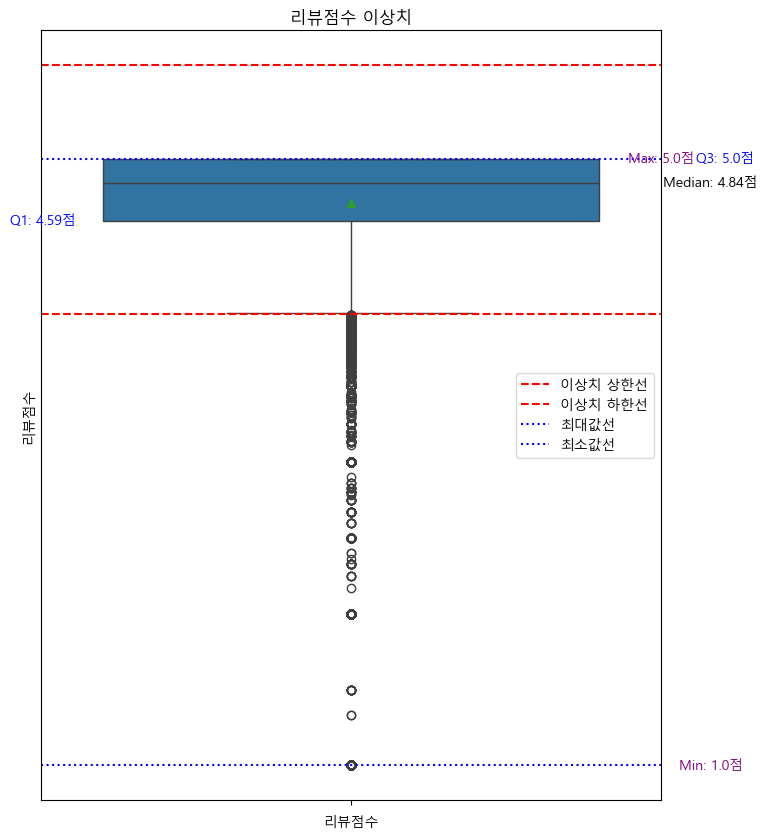

In [424]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=review_scores, showmeans=True)


#최대,최소값 
max_value = review_scores.max()
min_value = review_scores.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(-0.55, Q1, f'Q1: {Q1}점', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.65, Q3, f'Q3: {Q3}점', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}점', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.5, max_value, f'Max: {max_value}점', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}점', ha='center', va='center', fontsize=10, color='purple')

plt.title('리뷰점수 이상치')
plt.xlabel('리뷰점수')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [425]:
#2161개의 이상치 발견 

cleaned_review_scores= review_scores[(review_scores >= lower_bound) & (review_scores <= upper_bound)]
cleaned_review_scores

0        4.96
1        4.80
2        4.80
3        4.72
4        4.74
         ... 
90438    5.00
90568    5.00
90590    5.00
90648    5.00
90735    5.00
Name: 리뷰점수, Length: 63704, dtype: float64

이상치 제거 (63703개)<br>
리뷰점수가 3점대 밑으로는 고객들이 잘 보지 않음 

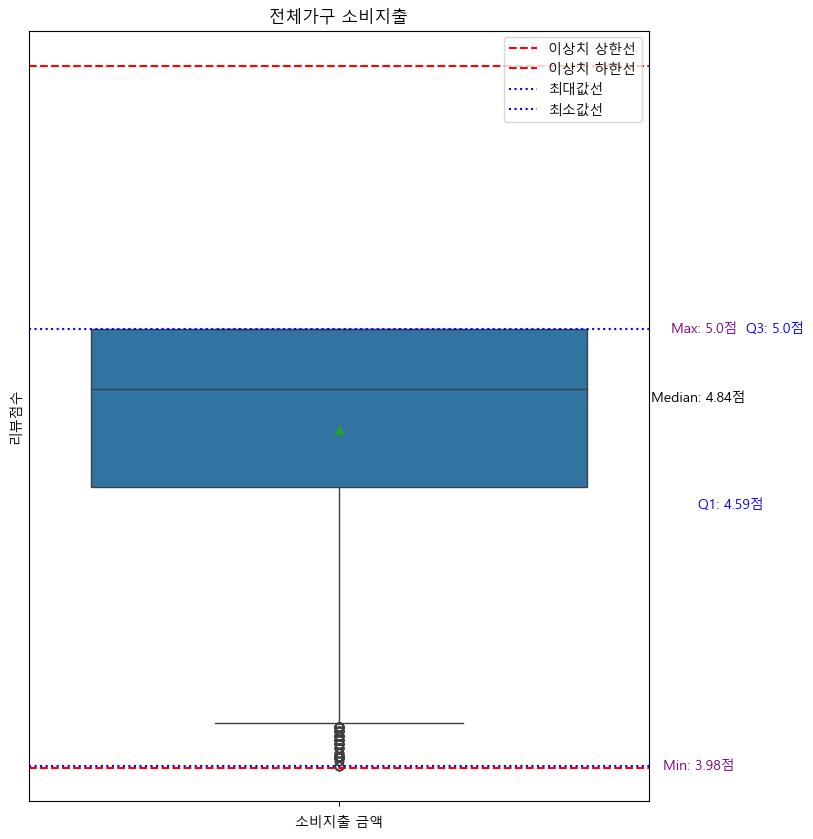

In [426]:
cleaned_review_scores= review_scores[(review_scores >= lower_bound) & (review_scores <= upper_bound)]

import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=cleaned_review_scores, showmeans=True)



#최대,최소값 
max_value = cleaned_review_scores.max()
min_value = cleaned_review_scores.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(0.58, Q1, f'Q1: {Q1}점', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.75, Q3, f'Q3: {Q3}점', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}점', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.59, max_value, f'Max: {max_value}점', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}점', ha='center', va='center', fontsize=10, color='purple')

plt.title('전체가구 소비지출')
plt.xlabel('소비지출 금액')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

이상치 처리 한 데이터 사용 

In [427]:
#이상치를 제거한 데이터
outliers = review_scores[(review_scores < lower_bound) | (review_scores > upper_bound)]
cleaned_df = df[~df['리뷰점수'].isin(outliers)]

cleaned_df

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,within a few hours,100.0,98.0,t,t,t,...,122,0,4.96,4.97,4.93,4.96,5.00,4.89,4.93,0.86
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,within a few hours,86.0,84.0,t,t,t,...,41,0,4.80,4.73,4.73,4.75,4.83,4.70,4.70,0.25
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,within a day,100.0,40.0,t,t,f,...,94,0,4.80,4.85,4.88,4.88,4.83,4.93,4.74,0.54
3,159736,https://www.airbnb.com/rooms/159736,Calm sunny double room with a queen size bed a...,766056,within an hour,100.0,78.0,t,t,t,...,96,0,4.72,4.79,4.66,4.75,4.89,4.34,4.66,0.62
4,165336,https://www.airbnb.com/rooms/165336,A stylish apartment close to Portobello market...,761400,within an hour,100.0,92.0,t,t,t,...,237,2,4.74,4.88,4.79,4.94,4.96,4.87,4.71,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90438,1112223577895036237,https://www.airbnb.com/rooms/1112223577895036237,"Offering city views, Luxuries 2 Bed Room Flat ...",15816781,within an hour,100.0,100.0,t,t,f,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
90568,1112524736745357245,https://www.airbnb.com/rooms/1112524736745357245,"Our flat is located in the heart of London, wi...",96218725,within an hour,100.0,100.0,t,t,f,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00
90590,1113042462528003601,https://www.airbnb.com/rooms/1113042462528003601,This wonderful 2 bedroom apartment is set with...,559052240,within an hour,99.0,100.0,t,t,f,...,2,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00
90648,1113966989586525761,https://www.airbnb.com/rooms/1113966989586525761,Welcome to my home! My modern 1 bedroom apartm...,15269465,within an hour,100.0,75.0,t,t,f,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.00


In [428]:
cleaned_df['슈퍼호스트'].value_counts()

슈퍼호스트
f    50586
t    13118
Name: count, dtype: int64

In [429]:
# 특정 컬럼의 값을 일괄적으로 변경
cleaned_df['슈퍼호스트'] = cleaned_df['슈퍼호스트'].replace({'True': 't', 'False': 'f'})
cleaned_df['슈퍼호스트']


0        t
1        t
2        f
3        t
4        t
        ..
90438    f
90568    f
90590    f
90648    f
90735    f
Name: 슈퍼호스트, Length: 63704, dtype: object

In [430]:
cleaned_df['리뷰점수'].describe()

count    63704.000000
mean         4.762755
std          0.276588
min          3.980000
25%          4.630000
50%          4.860000
75%          5.000000
max          5.000000
Name: 리뷰점수, dtype: float64

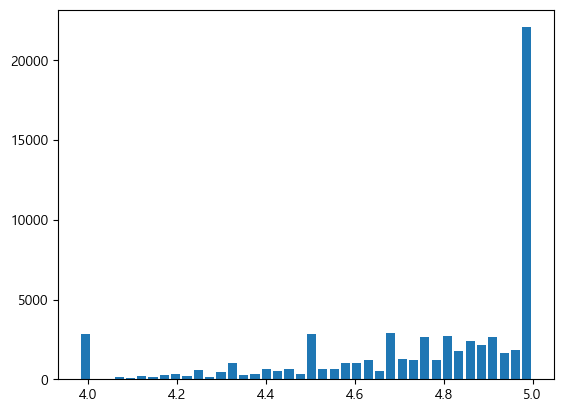

In [431]:
plt.hist(cleaned_df['리뷰점수'],bins=40, rwidth=0.8) 
plt.show()

In [432]:
superhost_t = cleaned_df[cleaned_df['슈퍼호스트'] == 't']['리뷰점수']
superhost_f = cleaned_df[cleaned_df['슈퍼호스트'] == 'f']['리뷰점수']


슈퍼호스트일 경우의 리뷰점수 빈도수 확인

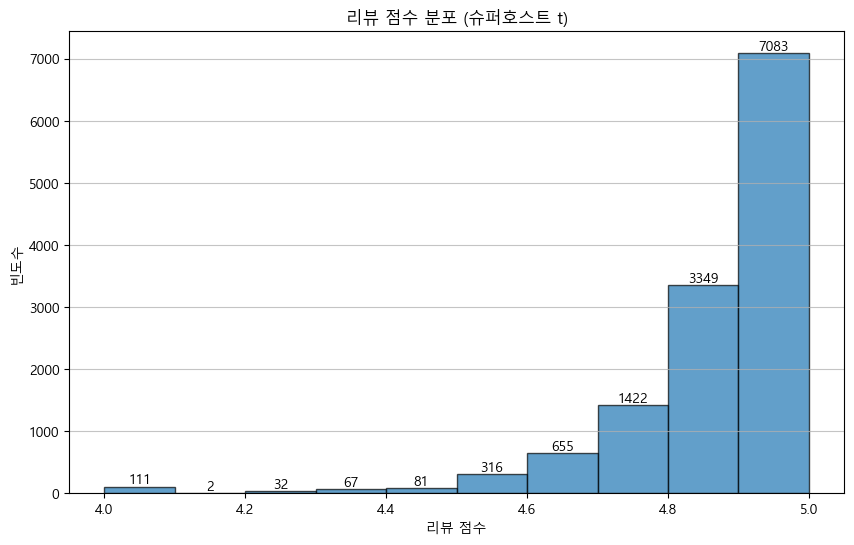

In [433]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(superhost_t, bins=10, edgecolor='k', alpha=0.7)

# 각 막대 위에 빈도수 표시
for count, bin in zip(counts, bins):
    plt.text(bin + (bins[1] - bins[0]) / 2, count, int(count), 
             ha='center', va='bottom')

plt.title('리뷰 점수 분포 (슈퍼호스트 t)')
plt.xlabel('리뷰 점수')
plt.ylabel('빈도수')
plt.grid(axis='y', alpha=0.75)

plt.show()

슈퍼호스트가 아닐경우의 빈도수 확인 

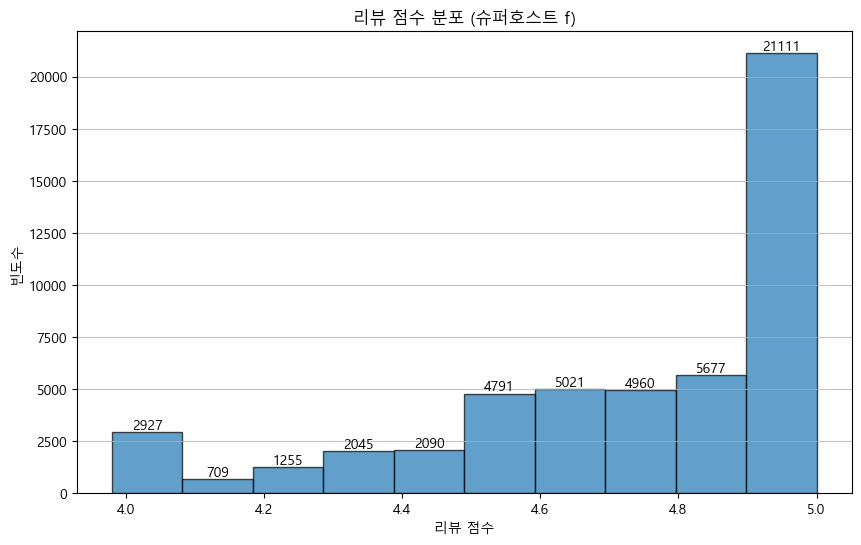

In [434]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(superhost_f, bins=10, edgecolor='k', alpha=0.7)

# 각 막대 위에 빈도수 표시
for count, bin in zip(counts, bins):
    plt.text(bin + (bins[1] - bins[0]) / 2, count, int(count), 
             ha='center', va='bottom')

plt.title('리뷰 점수 분포 (슈퍼호스트 f)')
plt.xlabel('리뷰 점수')
plt.ylabel('빈도수')
plt.grid(axis='y', alpha=0.75)

plt.show()

In [435]:
num_review = cleaned_df['리뷰수']
num_review

0        122
1         41
2         94
3         96
4        237
        ... 
90438      1
90568      1
90590      2
90648      1
90735      1
Name: 리뷰수, Length: 63704, dtype: int64

리뷰수 이상치제거 (Q1,Q3)<br>
이상치가 5%가 넘어서 q1,q3로는 불가

In [436]:
#이상치 
#1단계 사분위수 (q1, q3, q2, iqr )
Q1 = num_review.quantile(0.25)
Q3 = num_review.quantile(0.75)
Median = num_review.median()

IQR = Q3 - Q1 

print(Q1)
print(Q3)
print(IQR)
#2단계 : 이상치 임계값(threshold) 설정 

lower_bound = Q1 - (1.5 * IQR) #하한가
upper_bound = Q3 + (1.5 * IQR) #상한가


print(lower_bound)
print(upper_bound)

3.0
26.0
23.0
-31.5
60.5


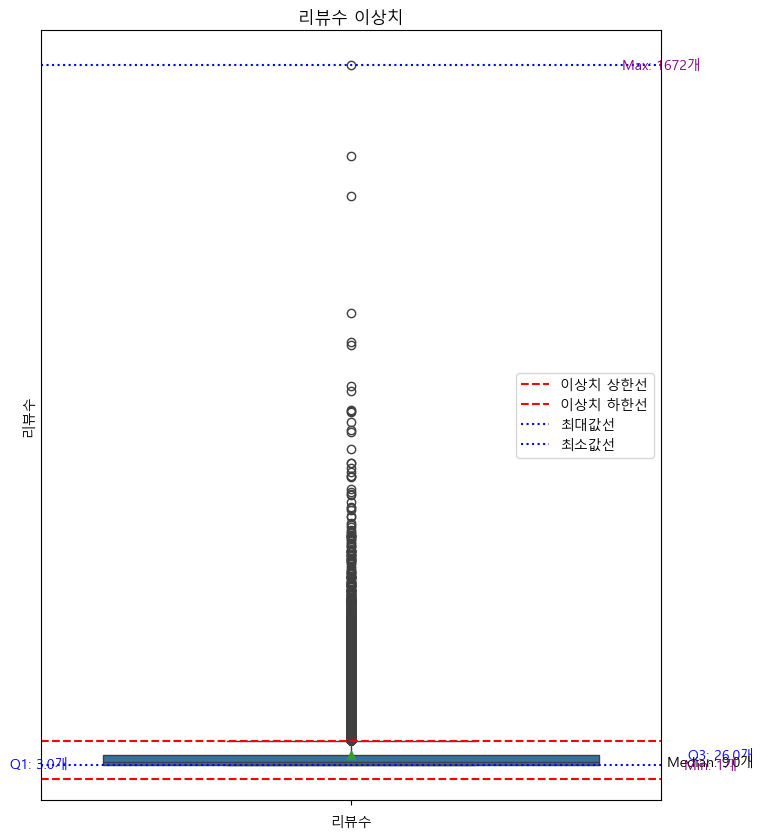

In [437]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, ax = plt.subplots(figsize=(8,10))
sns.boxplot(data=num_review, showmeans=True)


#최대,최소값 
max_value = num_review.max()
min_value = num_review.min()

#이상치 상한치 하한치 선 표기
ax.axhline(y=upper_bound, color='red', linestyle='--', label='이상치 상한선')
ax.axhline(y=lower_bound, color='red', linestyle='--', label='이상치 하한선')
ax.axhline(y=max_value, color='blue', linestyle=':', label='최대값선')
ax.axhline(y=min_value, color='blue', linestyle=':', label='최소값선')



#Q1, Q3, Median 값 출력
ax.text(-0.55, Q1, f'Q1: {Q1}개', ha='left', va='center', fontsize=10,color='blue' )
ax.text(0.65, Q3, f'Q3: {Q3}개', ha='right', va='center', fontsize=10,color='blue' )
ax.text(0.58, Median, f'Median: {Median}개', ha='center', va='center', fontsize=10, color='black')

#최대 최소값 표시
ax.text(0.5, max_value, f'Max: {max_value}개', ha='center', va='center', fontsize=10, color='purple')
ax.text(0.58, min_value, f'Min: {min_value}개', ha='center', va='center', fontsize=10, color='purple')

plt.title('리뷰수 이상치')
plt.xlabel('리뷰수')
plt.yticks([])
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [438]:
num_review

0        122
1         41
2         94
3         96
4        237
        ... 
90438      1
90568      1
90590      2
90648      1
90735      1
Name: 리뷰수, Length: 63704, dtype: int64

In [439]:
#이상치 처리 6,627개 이상치 5% 넘음
cleaned_num_review= num_review[(num_review >= lower_bound) & (num_review <= upper_bound)]
cleaned_num_review

1        41
5        10
6         9
7        56
10       11
         ..
90438     1
90568     1
90590     2
90648     1
90735     1
Name: 리뷰수, Length: 57077, dtype: int64

In [440]:
new_df = cleaned_df.copy()

min-max scaler사용 

In [441]:
cleaned_df.columns

Index(['숙소_id', '숙소_url', '숙소_상세설명', '호스트_id', '답변_평균시간', '문의_응답률', '예약_수락률',
       '프로필사진_소지_여부', '신원_검증_여부', '슈퍼호스트', '숙소_수', '숙소_지역', '위도', '경도',
       '숙소_유형', '수용인원수', '욕실수', '침실수', '침대수', '어메니티', '숙소_가격', '숙소_예약가능_여부',
       '최소_숙박일', '최대_숙박일', '많은_최대_숙박일', '적은_최대_숙박일', '리뷰수', '30일_리뷰수', '리뷰점수',
       '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수',
       '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [442]:
cleaned_df.dtypes

숙소_id            int64
숙소_url          object
숙소_상세설명         object
호스트_id           int64
답변_평균시간         object
문의_응답률         float64
예약_수락률         float64
프로필사진_소지_여부     object
신원_검증_여부        object
슈퍼호스트           object
숙소_수           float64
숙소_지역           object
위도             float64
경도             float64
숙소_유형           object
수용인원수            int64
욕실수            float64
침실수            float64
침대수            float64
어메니티            object
숙소_가격           object
숙소_예약가능_여부      object
최소_숙박일           int64
최대_숙박일           int64
많은_최대_숙박일      float64
적은_최대_숙박일      float64
리뷰수              int64
30일_리뷰수          int64
리뷰점수           float64
숙소_정확성_리뷰점수    float64
숙소_청결도_리뷰점수    float64
숙소_체크인_리뷰점수    float64
숙소_소통_리뷰점수     float64
숙소_위치_리뷰점수     float64
숙소_가격_리뷰점수     float64
평균_리뷰수         float64
dtype: object

In [443]:
import numpy as np
import pandas as pd

columns_to_scale = ['리뷰점수','숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', 
                    '숙소_소통_리뷰점수', '숙소_위치_리뷰점수','숙소_가격_리뷰점수','리뷰수','숙소_가격',
                    '숙소_수','많은_최대_숙박일', '적은_최대_숙박일']

min_val = cleaned_df[columns_to_scale].min()
max_val = cleaned_df[columns_to_scale].max()

scaled_data = (cleaned_df[columns_to_scale] - min_val) / (max_val - min_val)

cleaned_df[columns_to_scale] = scaled_data

cov_cleaned_df = cleaned_df[columns_to_scale]

In [444]:
cov_cleaned_df

,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,리뷰수,숙소_가격,숙소_수,많은_최대_숙박일,적은_최대_숙박일
0,0.960784,0.994,0.986,0.992,1.0,0.978,0.986,0.072412,0.002986,0.000354,0.0,0.0
1,0.803922,0.946,0.946,0.95,0.966,0.94,0.94,0.023938,0.001213,0.000707,0.0,0.0
2,0.803922,0.97,0.976,0.976,0.966,0.986,0.948,0.055655,0.002239,0.0,0.0,0.0
3,0.72549,0.958,0.932,0.95,0.978,0.868,0.932,0.056852,0.001213,0.000707,0.0,0.0
4,0.745098,0.976,0.958,0.988,0.992,0.974,0.942,0.141233,0.001866,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90438,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.002053,0.006187,0.0,0.0
90568,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.001456,0.003359,0.0,0.0
90590,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000598,0.002538,0.002828,0.0,0.0
90648,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.002034,0.000354,0.0,0.0


In [445]:
cov_cleaned_df.corr(method='pearson')

,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,리뷰수,숙소_가격,숙소_수,많은_최대_숙박일,적은_최대_숙박일
리뷰점수,1.000000,0.675822,0.628778,0.480070,0.533526,0.393711,0.668312,-0.029070,0.012669,-0.081111,-0.009599,-0.009633
숙소_정확성_리뷰점수,0.675822,1.000000,0.548022,0.460615,0.496866,0.373642,0.618230,0.006393,-0.004714,-0.073362,-0.006415,-0.006623
숙소_청결도_리뷰점수,0.628778,0.548022,1.000000,0.347210,0.361207,0.299495,0.520352,0.025720,0.022664,-0.040233,0.002752,0.002617
숙소_체크인_리뷰점수,0.480070,0.460615,0.347210,1.000000,0.556777,0.284698,0.430093,0.027829,-0.005555,-0.102604,-0.008758,-0.008650
숙소_소통_리뷰점수,0.533526,0.496866,0.361207,0.556777,1.000000,0.296060,0.481682,0.007782,-0.007643,-0.118327,-0.012362,-0.011975
숙소_위치_리뷰점수,0.393711,0.373642,0.299495,0.284698,0.296060,1.000000,0.410757,0.008827,0.042175,-0.021881,0.003369,0.003404
숙소_가격_리뷰점수,0.668312,0.618230,0.520352,0.430093,0.481682,0.410757,1.000000,0.011316,-0.020379,-0.083581,-0.007361,-0.007153
리뷰수,-0.029070,0.006393,0.025720,0.027829,0.007782,0.008827,0.011316,1.000000,0.001213,-0.037579,0.004134,0.000539
숙소_가격,0.012669,-0.004714,0.022664,-0.005555,-0.007643,0.042175,-0.020379,0.001213,1.000000,0.027032,0.009647,0.009551
숙소_수,-0.081111,-0.073362,-0.040233,-0.102604,-0.118327,-0.021881,-0.083581,-0.037579,0.027032,1.000000,-0.002181,-0.002126


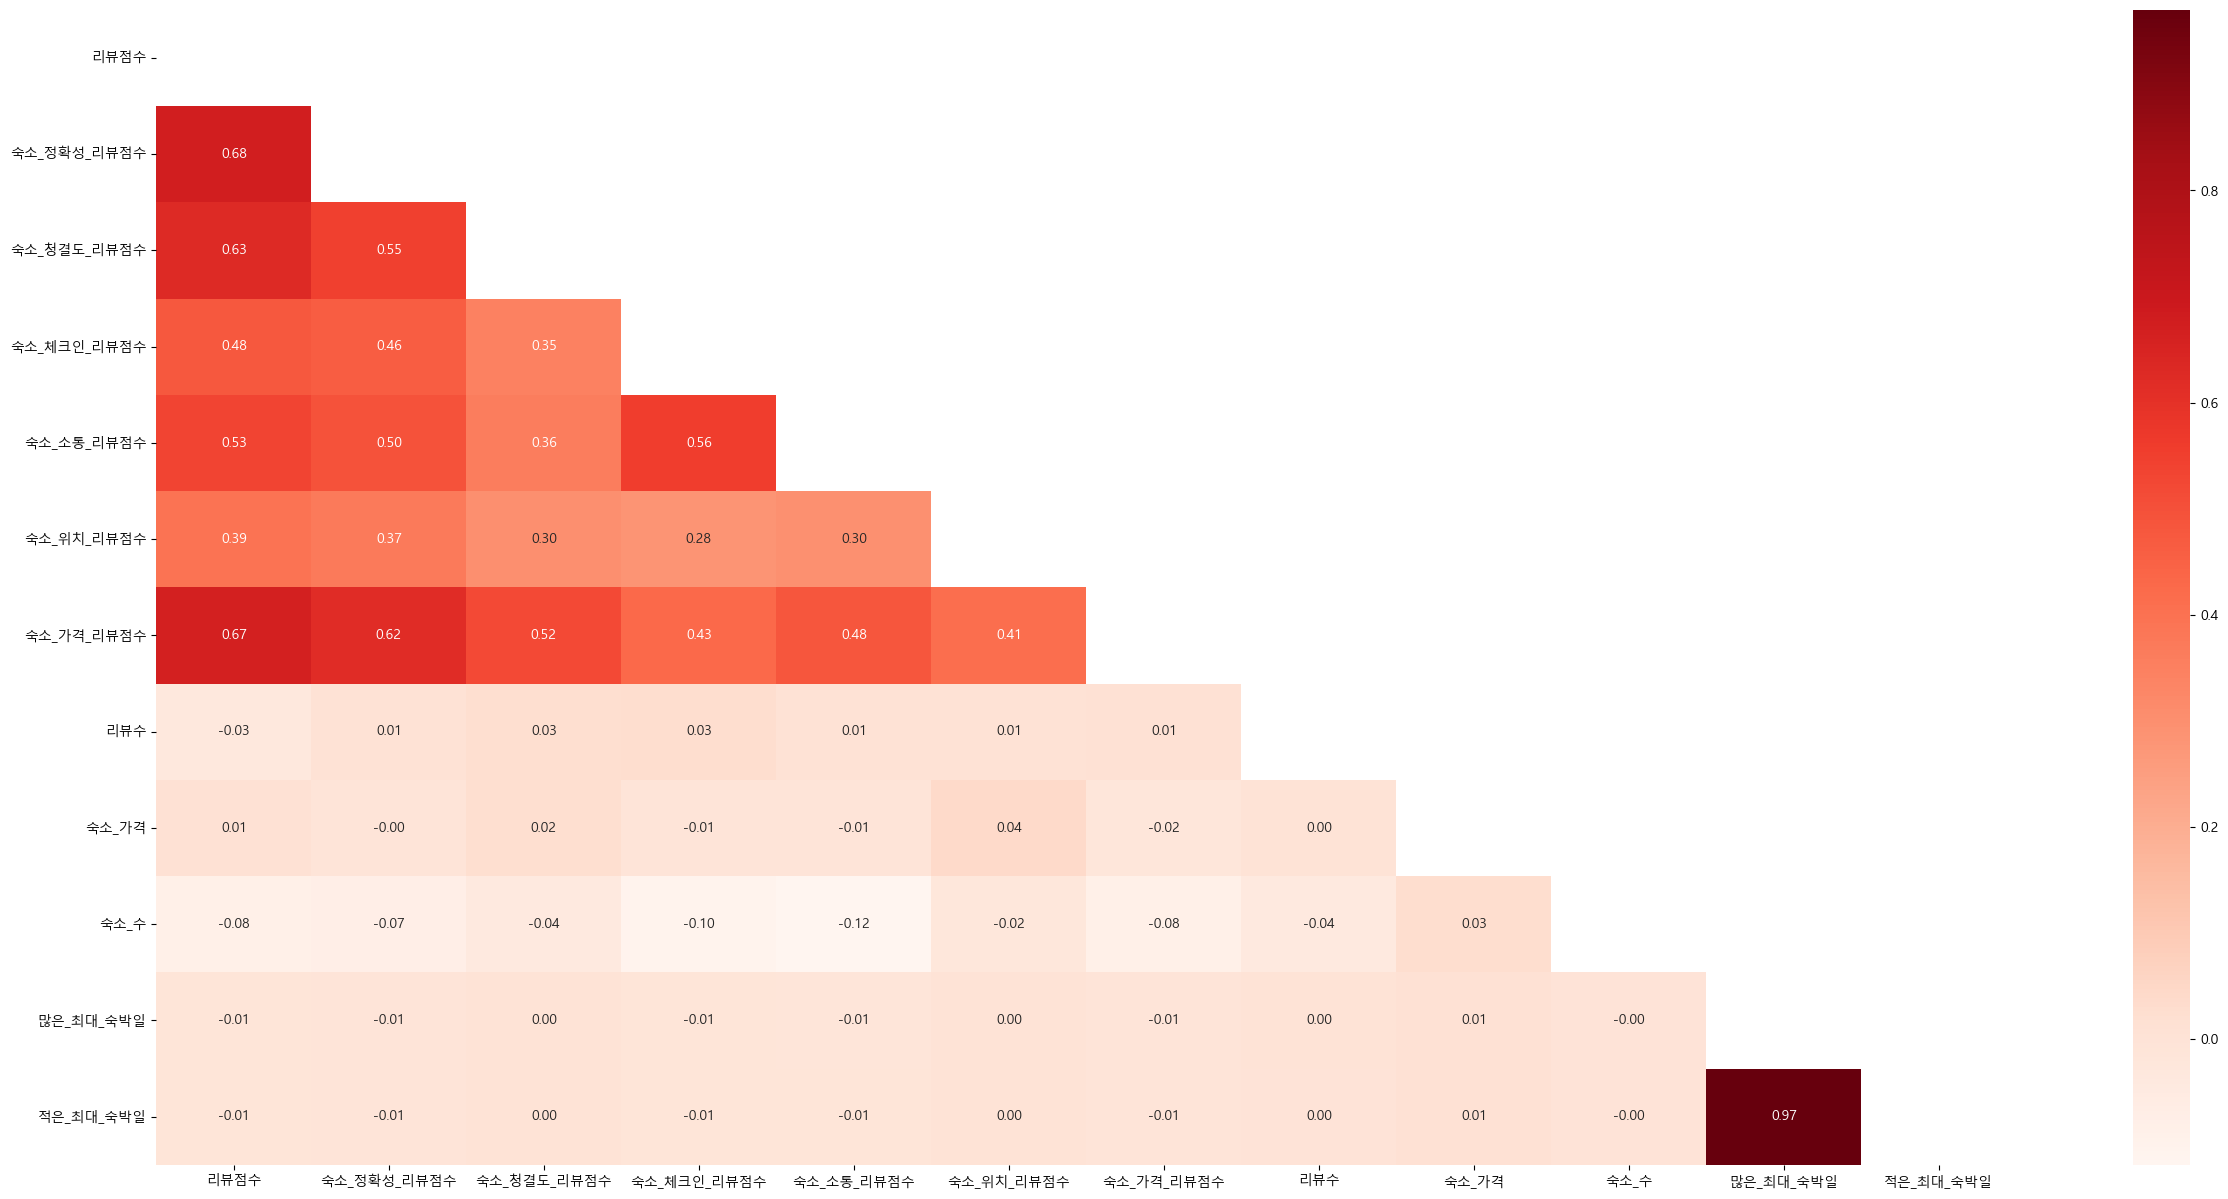

In [446]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 계산
corr = cov_cleaned_df.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='Reds')
plt.show()


boxplot으로 이상치 처리한 값으로 상관관계 분석

In [447]:
cov_new_df = new_df[columns_to_scale]

In [448]:
cov_new_df.corr(method='pearson')


,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,리뷰수,숙소_가격,숙소_수,많은_최대_숙박일,적은_최대_숙박일
리뷰점수,1.000000,0.675822,0.628778,0.480070,0.533526,0.393711,0.668312,-0.029070,0.012669,-0.081111,-0.009599,-0.009633
숙소_정확성_리뷰점수,0.675822,1.000000,0.548022,0.460615,0.496866,0.373642,0.618230,0.006393,-0.004714,-0.073362,-0.006415,-0.006623
숙소_청결도_리뷰점수,0.628778,0.548022,1.000000,0.347210,0.361207,0.299495,0.520352,0.025720,0.022664,-0.040233,0.002752,0.002617
숙소_체크인_리뷰점수,0.480070,0.460615,0.347210,1.000000,0.556777,0.284698,0.430093,0.027829,-0.005555,-0.102604,-0.008758,-0.008650
숙소_소통_리뷰점수,0.533526,0.496866,0.361207,0.556777,1.000000,0.296060,0.481682,0.007782,-0.007643,-0.118327,-0.012362,-0.011975
숙소_위치_리뷰점수,0.393711,0.373642,0.299495,0.284698,0.296060,1.000000,0.410757,0.008827,0.042175,-0.021881,0.003369,0.003404
숙소_가격_리뷰점수,0.668312,0.618230,0.520352,0.430093,0.481682,0.410757,1.000000,0.011316,-0.020379,-0.083581,-0.007361,-0.007153
리뷰수,-0.029070,0.006393,0.025720,0.027829,0.007782,0.008827,0.011316,1.000000,0.001213,-0.037579,0.004134,0.000539
숙소_가격,0.012669,-0.004714,0.022664,-0.005555,-0.007643,0.042175,-0.020379,0.001213,1.000000,0.027032,0.009647,0.009551
숙소_수,-0.081111,-0.073362,-0.040233,-0.102604,-0.118327,-0.021881,-0.083581,-0.037579,0.027032,1.000000,-0.002181,-0.002126


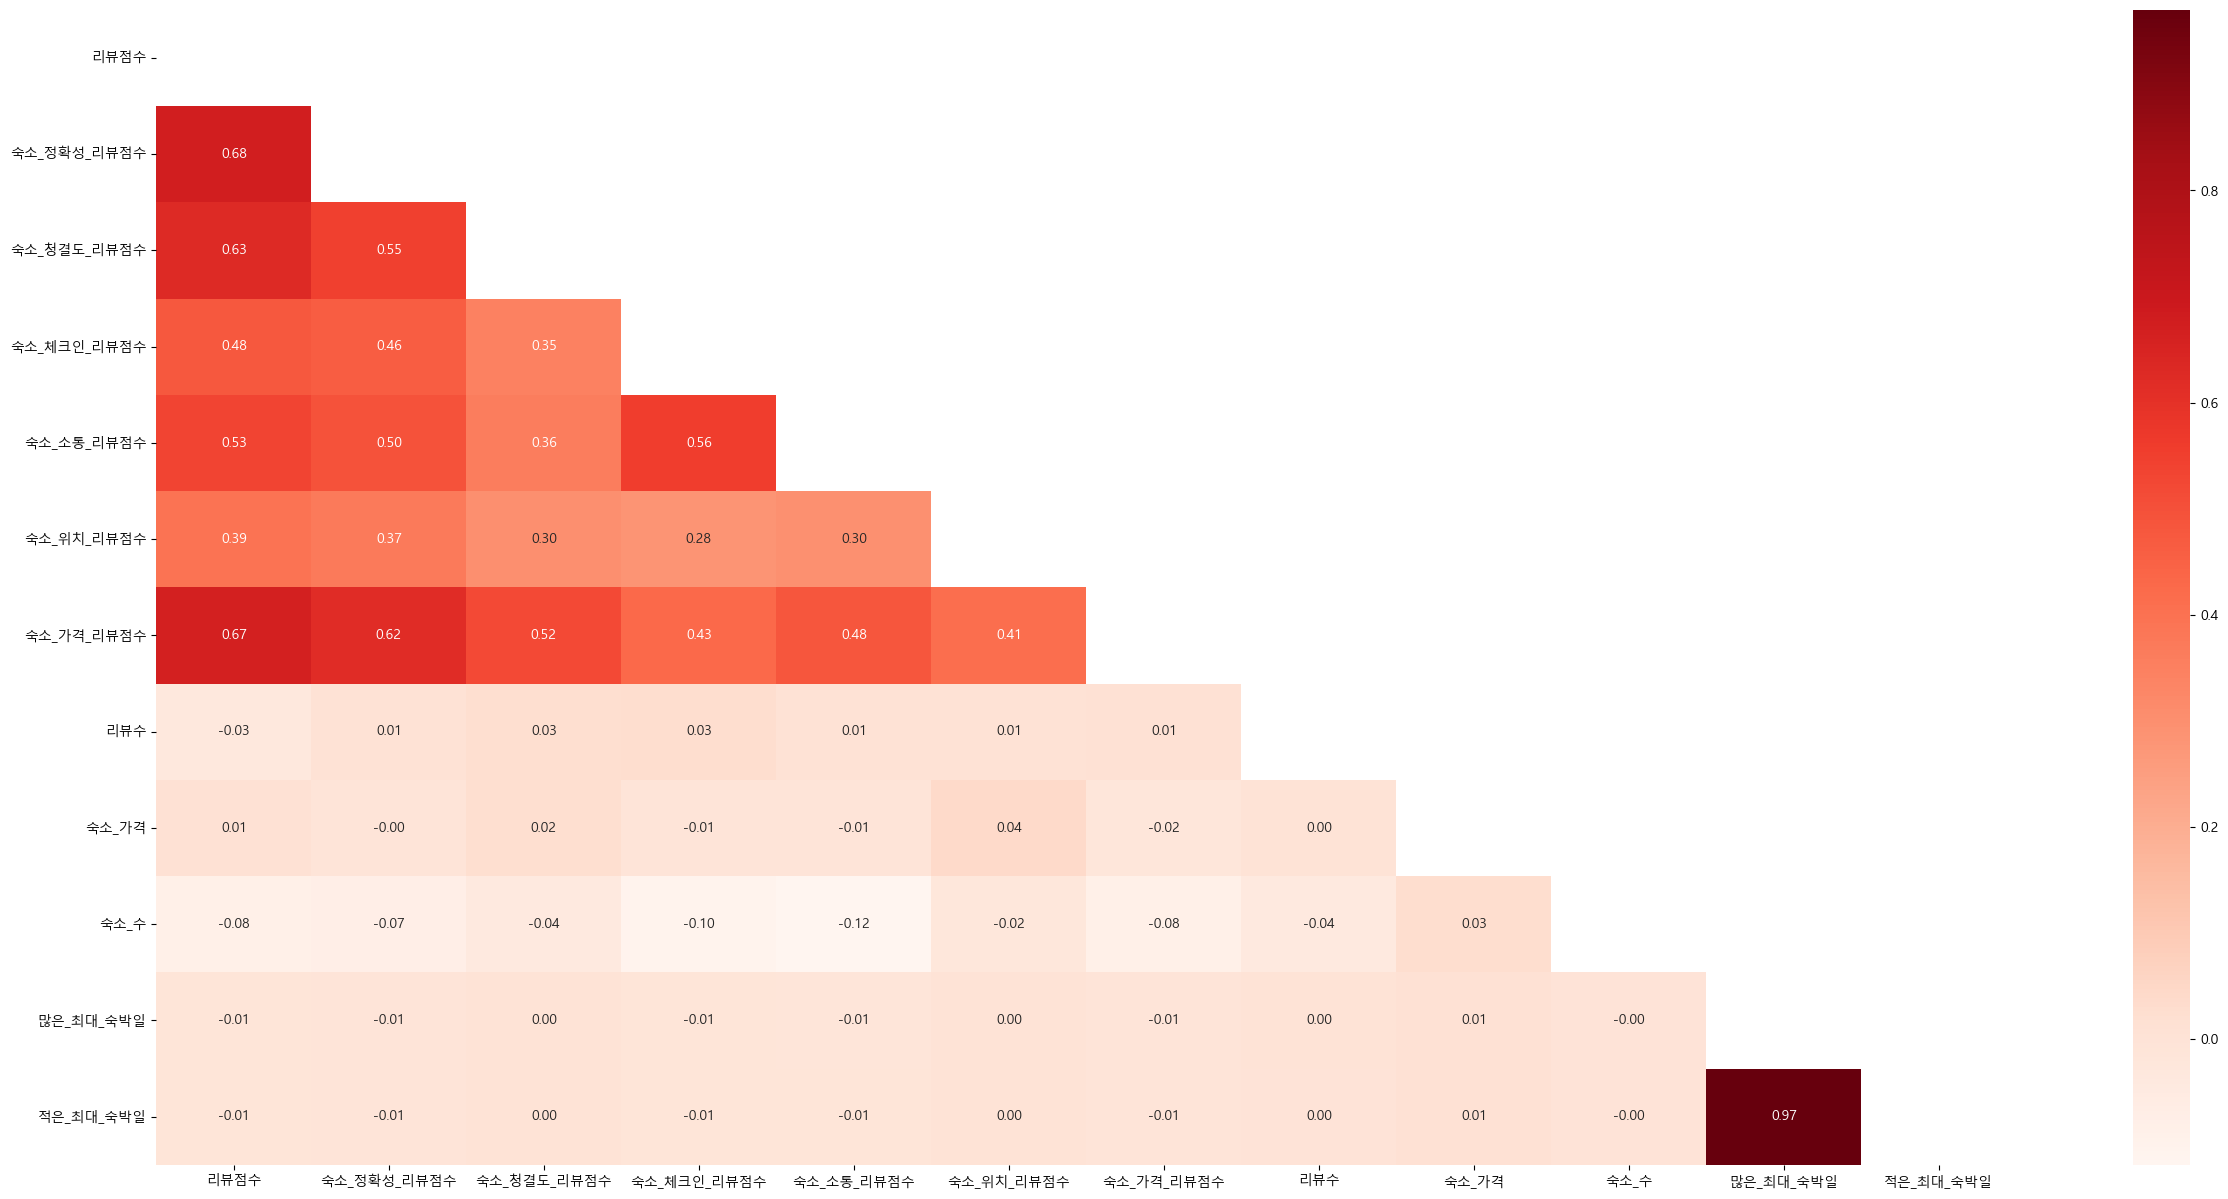

In [449]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 계산
corr = cov_new_df.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='Reds')
plt.show()


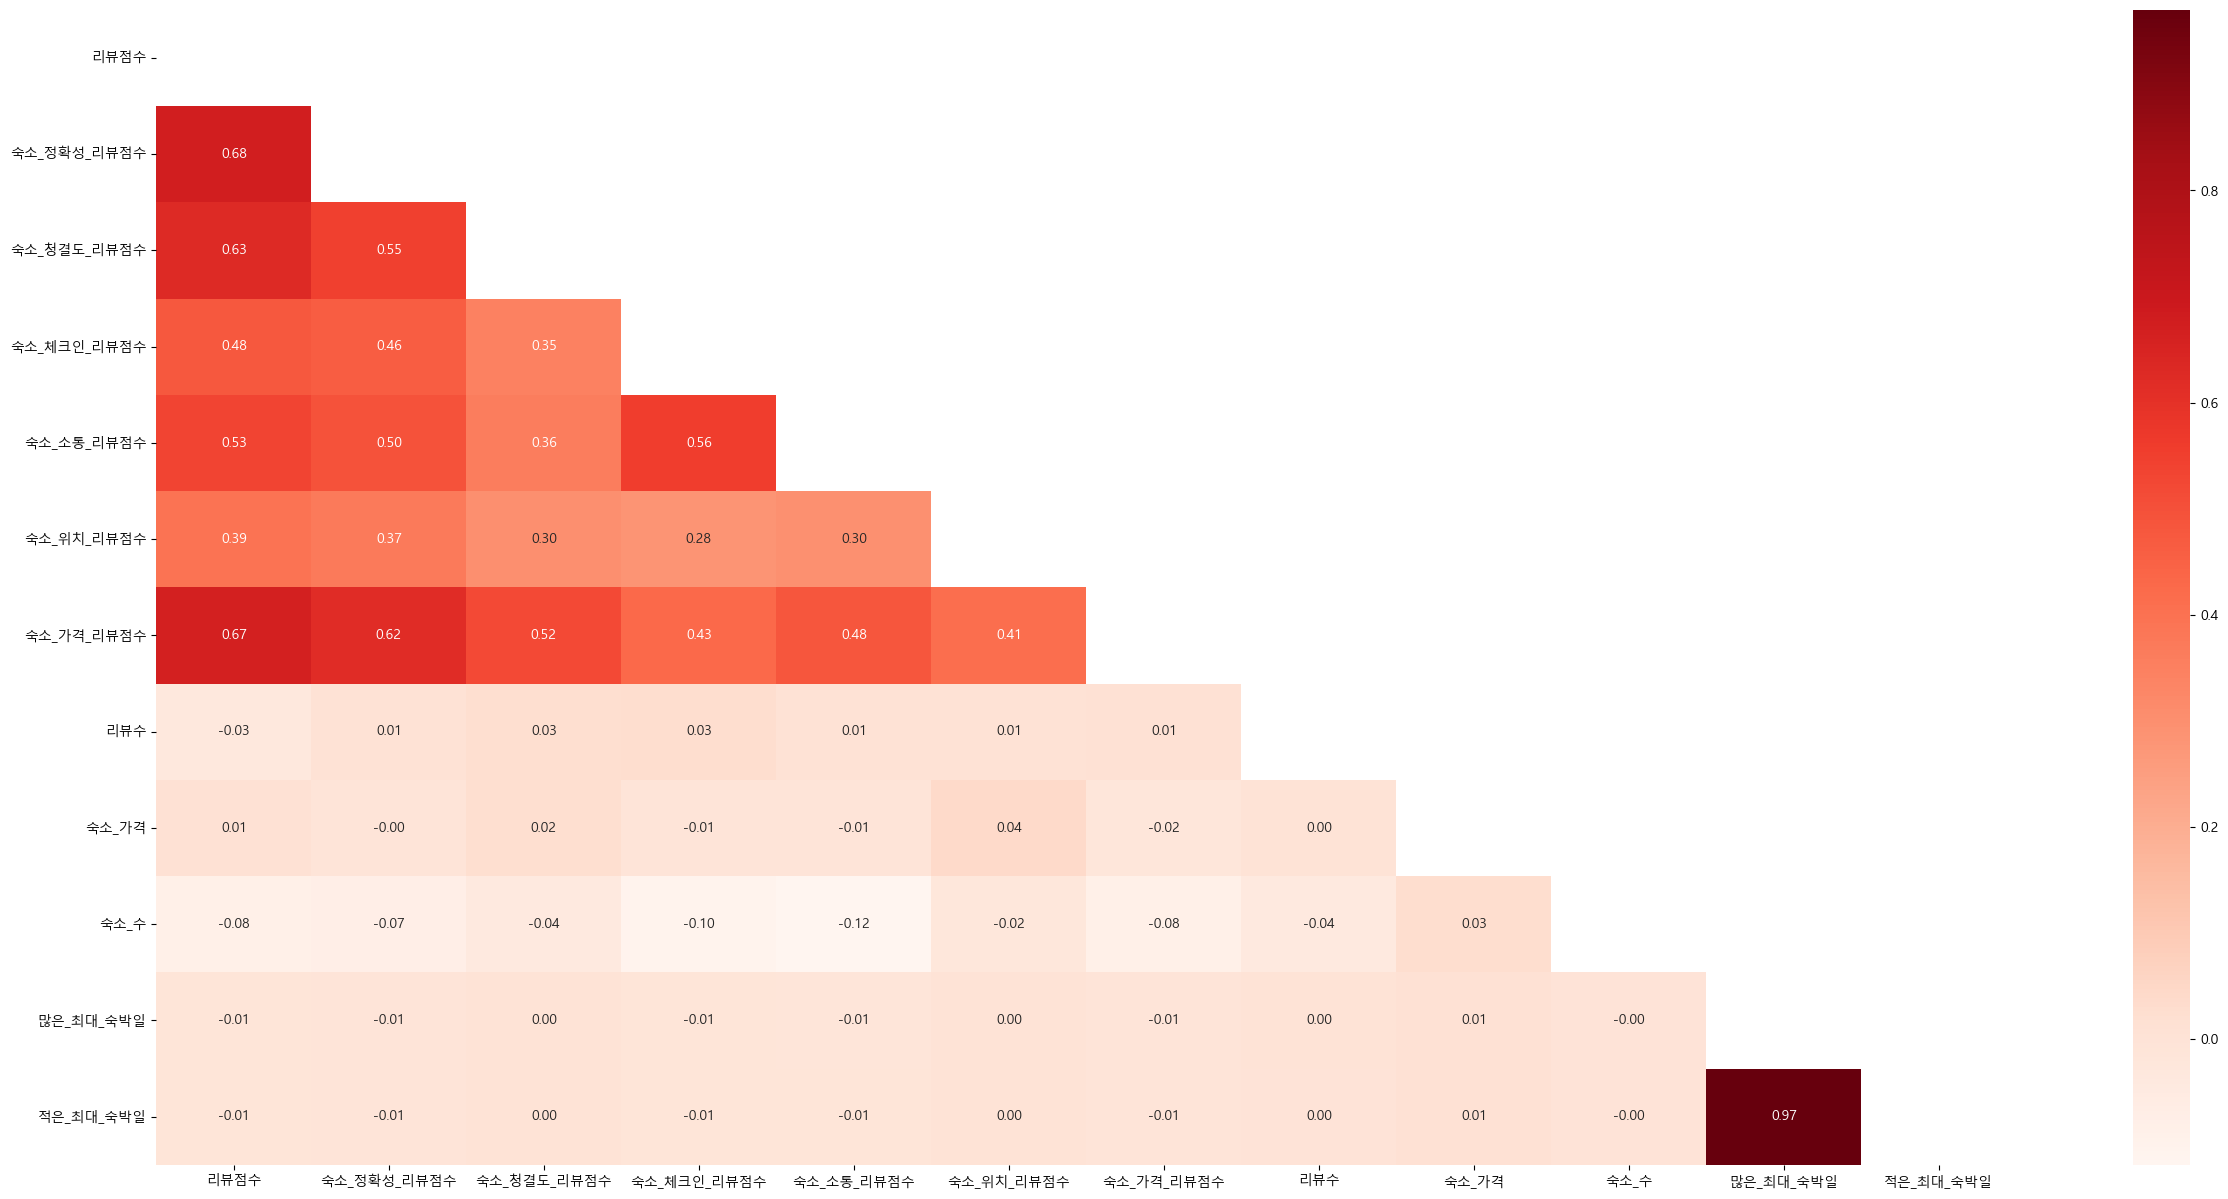

In [450]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 계산
corr = cov_cleaned_df.corr()

# 마스크 생성 (상단 삼각형)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='Reds')
plt.show()

In [451]:
# min = np.min(num_review)
# max = np.max(num_review)

# cleaned_df['리뷰수_minmax'] = (cleaned_df['리뷰수'] - min) / (max - min)
# cleaned_df['리뷰수_minmax']

In [452]:
# review_scores = cleaned_df['리뷰점수']

In [453]:
# min = np.min(review_scores)
# max = np.max(review_scores)

# cleaned_df['리뷰점수_minmax'] = (cleaned_df['리뷰점수'] - min) / (max - min)
# cleaned_df['리뷰점수_minmax']

In [454]:
cleaned_df.head()

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,within a few hours,100.0,98.0,t,t,t,...,0.072412,0,0.960784,0.994,0.986,0.992,1.0,0.978,0.986,0.86
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,within a few hours,86.0,84.0,t,t,t,...,0.023938,0,0.803922,0.946,0.946,0.95,0.966,0.94,0.94,0.25
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,within a day,100.0,40.0,t,t,f,...,0.055655,0,0.803922,0.97,0.976,0.976,0.966,0.986,0.948,0.54
3,159736,https://www.airbnb.com/rooms/159736,Calm sunny double room with a queen size bed a...,766056,within an hour,100.0,78.0,t,t,t,...,0.056852,0,0.72549,0.958,0.932,0.95,0.978,0.868,0.932,0.62
4,165336,https://www.airbnb.com/rooms/165336,A stylish apartment close to Portobello market...,761400,within an hour,100.0,92.0,t,t,t,...,0.141233,2,0.745098,0.976,0.958,0.988,0.992,0.974,0.942,1.57


In [455]:
cleaned_df

,숙소_id,숙소_url,숙소_상세설명,호스트_id,답변_평균시간,문의_응답률,예약_수락률,프로필사진_소지_여부,신원_검증_여부,슈퍼호스트,...,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수
0,312761,https://www.airbnb.com/rooms/312761,"Very central location, in the middle of Shored...",1608226,within a few hours,100.0,98.0,t,t,t,...,0.072412,0,0.960784,0.994,0.986,0.992,1.0,0.978,0.986,0.86
1,13913,https://www.airbnb.com/rooms/13913,My bright double bedroom with a large window h...,54730,within a few hours,86.0,84.0,t,t,t,...,0.023938,0,0.803922,0.946,0.946,0.95,0.966,0.94,0.94,0.25
2,15400,https://www.airbnb.com/rooms/15400,Lots of windows and light. St Luke's Gardens ...,60302,within a day,100.0,40.0,t,t,f,...,0.055655,0,0.803922,0.97,0.976,0.976,0.966,0.986,0.948,0.54
3,159736,https://www.airbnb.com/rooms/159736,Calm sunny double room with a queen size bed a...,766056,within an hour,100.0,78.0,t,t,t,...,0.056852,0,0.72549,0.958,0.932,0.95,0.978,0.868,0.932,0.62
4,165336,https://www.airbnb.com/rooms/165336,A stylish apartment close to Portobello market...,761400,within an hour,100.0,92.0,t,t,t,...,0.141233,2,0.745098,0.976,0.958,0.988,0.992,0.974,0.942,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90438,1112223577895036237,https://www.airbnb.com/rooms/1112223577895036237,"Offering city views, Luxuries 2 Bed Room Flat ...",15816781,within an hour,100.0,100.0,t,t,f,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
90568,1112524736745357245,https://www.airbnb.com/rooms/1112524736745357245,"Our flat is located in the heart of London, wi...",96218725,within an hour,100.0,100.0,t,t,f,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00
90590,1113042462528003601,https://www.airbnb.com/rooms/1113042462528003601,This wonderful 2 bedroom apartment is set with...,559052240,within an hour,99.0,100.0,t,t,f,...,0.000598,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.00
90648,1113966989586525761,https://www.airbnb.com/rooms/1113966989586525761,Welcome to my home! My modern 1 bedroom apartm...,15269465,within an hour,100.0,75.0,t,t,f,...,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00


In [456]:
num_review.describe()

count    63704.000000
mean        25.221807
std         49.356797
min          1.000000
25%          3.000000
50%          9.000000
75%         26.000000
max       1672.000000
Name: 리뷰수, dtype: float64